In [156]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import sklearn.feature_selection as feature_selection
import matplotlib.pyplot as plt
import sklearn.ensemble as ensemble
import sklearn.covariance as covariance
import sklearn.linear_model as linear_model
import sklearn.mixture as mixture
import sklearn.model_selection as model_selection
import sklearn.impute as impute
import keras

Using TensorFlow backend.


In [37]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [40]:
def isnull(df, features):
    for feats in features:
        if df[feats].isnull().sum()>0:
            print(feats,'null values:', df[feats].isnull().sum())
            print(feats,':',df[feats].isnull().value_counts())

In [41]:
train_feats=train.columns.to_list()
test_feats=test.columns.to_list()

In [42]:
isnull(train, train_feats)

Age null values: 177
Age : False    714
True     177
Name: Age, dtype: int64
Cabin null values: 687
Cabin : True     687
False    204
Name: Cabin, dtype: int64
Embarked null values: 2
Embarked : False    889
True       2
Name: Embarked, dtype: int64


In [43]:
isnull(test, test_feats)

Age null values: 86
Age : False    332
True      86
Name: Age, dtype: int64
Fare null values: 1
Fare : False    417
True       1
Name: Fare, dtype: int64
Cabin null values: 327
Cabin : True     327
False     91
Name: Cabin, dtype: int64


In [44]:
def plot(df, features):
    for feats in features:
        if len(df[feats].value_counts())<10:
            val_feats=df[feats].value_counts()
            df[feats].value_counts().plot.bar()
            plt.xlabel(feats)
            plt.show()
            print(feats, val_feats)

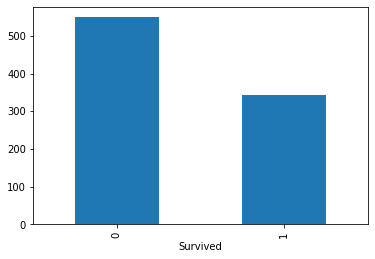

Survived 0    549
1    342
Name: Survived, dtype: int64


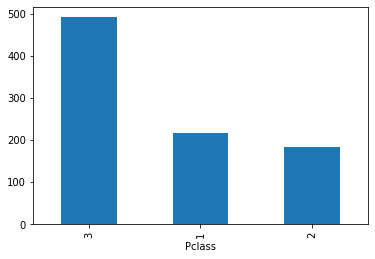

Pclass 3    491
1    216
2    184
Name: Pclass, dtype: int64


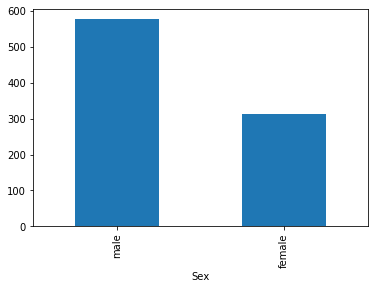

Sex male      577
female    314
Name: Sex, dtype: int64


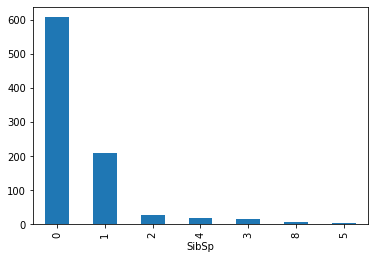

SibSp 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


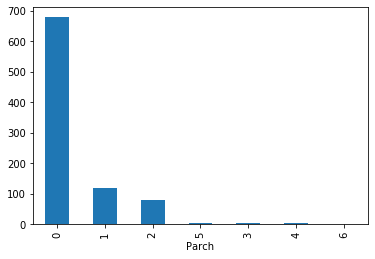

Parch 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


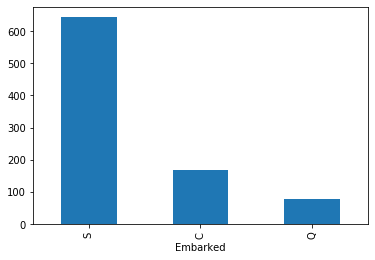

Embarked S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [45]:
plot(train, train_feats)

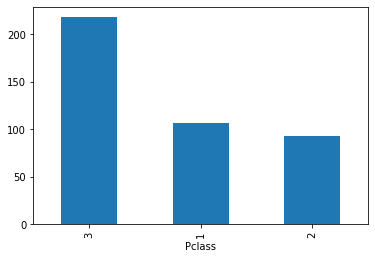

Pclass 3    218
1    107
2     93
Name: Pclass, dtype: int64


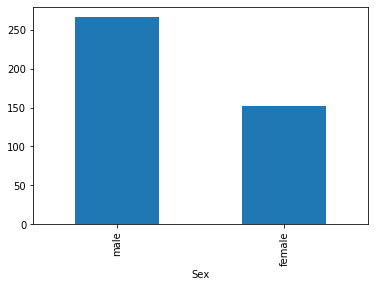

Sex male      266
female    152
Name: Sex, dtype: int64


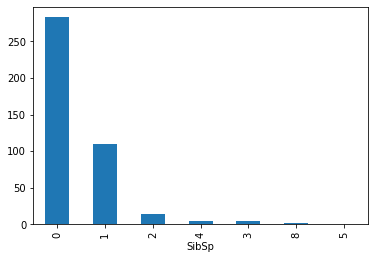

SibSp 0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64


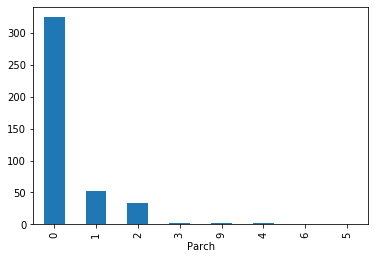

Parch 0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64


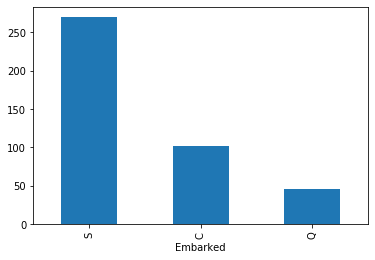

Embarked S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [46]:
plot(test, test_feats)

In [47]:
def fillna(df, features):
    for feats in features:
        if len(df[feats].unique())>20 and df[feats].dtypes!='O' and feats not in ['PassengerId']:
            df[feats+'_median']=df[feats].fillna(df[feats].median())
            plt.subplot(221)
            df[feats+'_median'].plot.hist()
            plt.xlabel(feats+'_median')
            df[feats+'_rs']=df[feats]
            rs=df[feats].dropna().sample(df[feats].isnull().sum())
            rs.index=df[df[feats].isnull()].index
            df.loc[df[feats].isnull(), feats+'_rs']=rs
            
            plt.subplots(222)
            df[feats+'_rs'].plot.hist()

            plt.xlabel(feats+'_rs')
            
            plt.subplot(223)
            df[feats+'_median'].plot.kde()
            plt.xlabel(feats+'_median')
            
            plt.subplot(224)
            df[feats+'_rs'].plot.kde()
            plt.xlabel(feats+'_rs')

            
            plt.show()

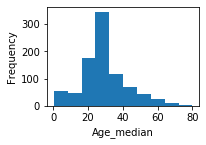

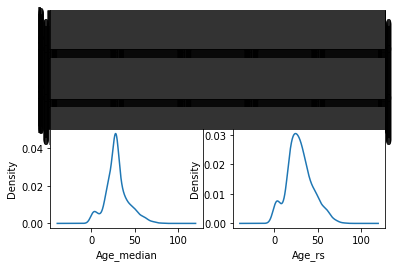

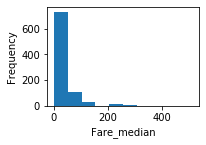

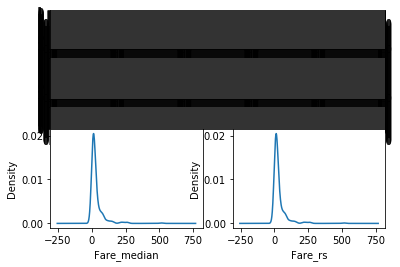

In [48]:
fillna(train, train_feats)

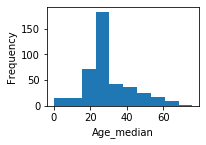

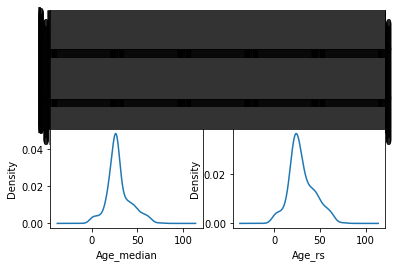

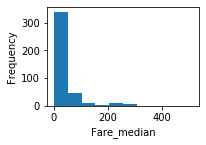

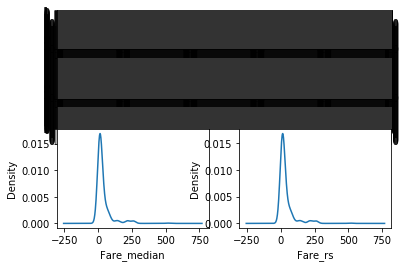

In [49]:
fillna(test, test_feats)

In [50]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_rs,Fare_median,Fare_rs
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.5,7.8292,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.0,7.0000,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,62.0,9.6875,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,27.0,8.6625,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,22.0,12.2875,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,27.0,26.0,8.0500,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,39.0,39.0,108.9000,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,38.5,38.5,7.2500,7.2500
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,27.0,29.0,8.0500,8.0500


In [51]:
def fill_catcol(df, features):
    for features in features:
        if df[features].dtypes=='O' and features not in ['Name', 'Ticket', 'Cabin']:
            df[features]=df[features].fillna(df[features].mode()[0])
            print(df[features])


In [52]:
fill_catcol(train, train_feats)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [53]:
fill_catcol(test, test_feats)

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object
0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object


In [54]:
def encoding(df, features):
    for feats in features:
        if df[feats].dtype=='O' and len(df[feats].unique())<10:
            df[feats+'_le']=preprocessing.LabelEncoder().fit_transform(df[feats])

In [55]:
encoding(train, train_feats)

In [56]:
encoding(test, test_feats)

In [57]:
def transformation(df, features):
    df[features+'_sc']= preprocessing.StandardScaler().fit_transform(df[features].values.reshape(-1,1))
    df[features+'_mm']= preprocessing.MinMaxScaler().fit_transform(df[features].values.reshape(-1,1))
    df[features+'_mab']= preprocessing.MaxAbsScaler().fit_transform(df[features].values.reshape(-1,1))
    df[features+'_rs']= preprocessing.RobustScaler().fit_transform(df[features].values.reshape(-1,1))
    #df[features+'ohe']= preprocessing.OneHotEncoder().fit_transform(df[features].values.reshape(-1,1))

In [58]:
transformation(train,  'Fare_median')

In [59]:
pd.DataFrame(preprocessing.PolynomialFeatures(degree=3).fit_transform(train['Fare'].values.reshape(-1,1)))

,0,1,2,3
0,1.0,7.2500,52.562500,381.078125
1,1.0,71.2833,5081.308859,362212.463781
2,1.0,7.9250,62.805625,497.734578
3,1.0,53.1000,2819.610000,149721.291000
4,1.0,8.0500,64.802500,521.660125
...,...,...,...,...
886,1.0,13.0000,169.000000,2197.000000
887,1.0,30.0000,900.000000,27000.000000
888,1.0,23.4500,549.902500,12895.213625
889,1.0,30.0000,900.000000,27000.000000


In [60]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_rs,Fare_median,Fare_rs,Sex_le,Embarked_le
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.5,7.8292,7.8292,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.0,7.0000,7.0000,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,62.0,9.6875,9.6875,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,27.0,8.6625,8.6625,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,22.0,12.2875,12.2875,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,27.0,26.0,8.0500,8.0500,1,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,39.0,39.0,108.9000,108.9000,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,38.5,38.5,7.2500,7.2500,1,2
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,27.0,29.0,8.0500,8.0500,1,2


In [61]:
def feats_trans(df, features):
    df[features+'_Poly']=preprocessing.PolynomialFeatures(degree=3).fit_transform(df[features].values.reshape(-1,1))[:,2:3]

In [62]:
feats_trans(train, 'Fare')

In [63]:
feats_trans(test, 'Fare_median')

In [64]:
train['log_Fare']=np.log(train['Fare']+1)
test['log_Fare']=np.log(test['Fare']+1)

In [65]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_median,Fare_rs,Sex_le,Embarked_le,Fare_median_sc,Fare_median_mm,Fare_median_mab,Fare_median_rs,Fare_Poly,log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,7.2500,7.2500,1,2,-0.502445,0.014151,0.014151,-0.312011,52.562500,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,71.2833,71.2833,0,0,0.786845,0.139136,0.139136,2.461242,5081.308859,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,7.9250,7.9250,0,2,-0.488854,0.015469,0.015469,-0.282777,62.805625,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,53.1000,53.1000,0,2,0.420730,0.103644,0.103644,1.673732,2819.610000,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,8.0500,8.0500,1,2,-0.486337,0.015713,0.015713,-0.277363,64.802500,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,13.0000,13.0000,1,2,-0.386671,0.025374,0.025374,-0.062981,169.000000,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,30.0000,30.0000,0,2,-0.044381,0.058556,0.058556,0.673281,900.000000,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,23.4500,23.4500,0,2,-0.176263,0.045771,0.045771,0.389604,549.902500,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,30.0000,30.0000,1,0,-0.044381,0.058556,0.058556,0.673281,900.000000,3.433987


In [66]:
isnull(train, train.columns)

Age null values: 177
Age : False    714
True     177
Name: Age, dtype: int64
Cabin null values: 687
Cabin : True     687
False    204
Name: Cabin, dtype: int64


In [67]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Age_rs',
       'Fare_median', 'Fare_rs', 'Sex_le', 'Embarked_le', 'Fare_median_sc',
       'Fare_median_mm', 'Fare_median_mab', 'Fare_median_rs', 'Fare_Poly',
       'log_Fare'],
      dtype='object')

In [68]:
isnull(test, test.columns)

Age null values: 86
Age : False    332
True      86
Name: Age, dtype: int64
Fare null values: 1
Fare : False    417
True       1
Name: Fare, dtype: int64
Cabin null values: 327
Cabin : True     327
False     91
Name: Cabin, dtype: int64
log_Fare null values: 1
log_Fare : False    417
True       1
Name: log_Fare, dtype: int64


In [69]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Age_rs',
       'Fare_median', 'Fare_rs', 'Sex_le', 'Embarked_le', 'Fare_median_Poly',
       'log_Fare'],
      dtype='object')

In [70]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Age_rs',
       'Fare_median', 'Fare_rs', 'Sex_le', 'Embarked_le', 'Fare_median_sc',
       'Fare_median_mm', 'Fare_median_mab', 'Fare_median_rs', 'Fare_Poly',
       'log_Fare'],
      dtype='object')

In [71]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_median,891.0,2.936158e+01,13.019697,0.420000,22.000000,28.000000,35.000000,80.000000
Age_rs,891.0,2.966200e+01,14.611243,0.420000,20.000000,28.000000,38.000000,80.000000
Fare_median,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [72]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_median,Age_rs,Fare_median,Fare_rs,Sex_le,Embarked_le,Fare_median_Poly,log_Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,29.599282,30.179426,35.576535,35.708344,0.636364,1.401914,4377.461560,3.016087
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,12.703770,13.969243,55.850103,55.865146,0.481622,0.854496,17277.476288,0.967998
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.170000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,23.000000,21.000000,7.895800,7.895800,0.000000,1.000000,62.343658,2.185579
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,27.000000,27.000000,14.454200,14.454200,1.000000,2.000000,208.923898,2.737881
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,35.750000,39.000000,31.471875,31.500000,1.000000,2.000000,990.481289,3.481240
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,76.000000,76.000000,512.329200,512.329200,1.000000,2.000000,262481.209173,6.240917


In [73]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_median,Fare_rs,Sex_le,Embarked_le,Fare_median_sc,Fare_median_mm,Fare_median_mab,Fare_median_rs,Fare_Poly,log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,7.2500,7.2500,1,2,-0.502445,0.014151,0.014151,-0.312011,52.562500,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,71.2833,71.2833,0,0,0.786845,0.139136,0.139136,2.461242,5081.308859,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,7.9250,7.9250,0,2,-0.488854,0.015469,0.015469,-0.282777,62.805625,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,53.1000,53.1000,0,2,0.420730,0.103644,0.103644,1.673732,2819.610000,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,8.0500,8.0500,1,2,-0.486337,0.015713,0.015713,-0.277363,64.802500,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,13.0000,13.0000,1,2,-0.386671,0.025374,0.025374,-0.062981,169.000000,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,30.0000,30.0000,0,2,-0.044381,0.058556,0.058556,0.673281,900.000000,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,23.4500,23.4500,0,2,-0.176263,0.045771,0.045771,0.389604,549.902500,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,30.0000,30.0000,1,0,-0.044381,0.058556,0.058556,0.673281,900.000000,3.433987


In [74]:
#fillna(train, train.columns)

In [75]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_median,Fare_rs,Sex_le,Embarked_le,Fare_median_sc,Fare_median_mm,Fare_median_mab,Fare_median_rs,Fare_Poly,log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,7.2500,7.2500,1,2,-0.502445,0.014151,0.014151,-0.312011,52.562500,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,71.2833,71.2833,0,0,0.786845,0.139136,0.139136,2.461242,5081.308859,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,7.9250,7.9250,0,2,-0.488854,0.015469,0.015469,-0.282777,62.805625,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,53.1000,53.1000,0,2,0.420730,0.103644,0.103644,1.673732,2819.610000,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,8.0500,8.0500,1,2,-0.486337,0.015713,0.015713,-0.277363,64.802500,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,13.0000,13.0000,1,2,-0.386671,0.025374,0.025374,-0.062981,169.000000,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,30.0000,30.0000,0,2,-0.044381,0.058556,0.058556,0.673281,900.000000,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,23.4500,23.4500,0,2,-0.176263,0.045771,0.045771,0.389604,549.902500,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,30.0000,30.0000,1,0,-0.044381,0.058556,0.058556,0.673281,900.000000,3.433987


In [76]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_median,891.0,2.936158e+01,13.019697,0.420000,22.000000,28.000000,35.000000,80.000000
Age_rs,891.0,2.966200e+01,14.611243,0.420000,20.000000,28.000000,38.000000,80.000000
Fare_median,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [77]:
transformation(train, 'log_Fare')
transformation(train, 'Age_median')

In [78]:
transformation(test, 'log_Fare')
transformation(test, 'Age_median')

In [79]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Age_rs',
       'Fare_median', 'Fare_rs', 'Sex_le', 'Embarked_le', 'Fare_median_sc',
       'Fare_median_mm', 'Fare_median_mab', 'Fare_median_rs', 'Fare_Poly',
       'log_Fare', 'log_Fare_sc', 'log_Fare_mm', 'log_Fare_mab', 'log_Fare_rs',
       'Age_median_sc', 'Age_median_mm', 'Age_median_mab', 'Age_median_rs'],
      dtype='object')

In [80]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Fare_median_Poly,log_Fare,log_Fare_sc,log_Fare_mm,log_Fare_mab,log_Fare_rs,Age_median_sc,Age_median_mm,Age_median_mab,Age_median_rs
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,61.296373,2.178064,-0.866767,0.348997,0.348997,-0.432070,0.386231,0.452723,0.453947,0.588235
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,49.000000,2.079442,-0.968773,0.333195,0.333195,-0.508188,1.371370,0.617566,0.618421,1.568627
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,93.847656,2.369075,-0.669205,0.379604,0.379604,-0.284647,2.553537,0.815377,0.815789,2.745098
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,75.038906,2.268252,-0.773486,0.363449,0.363449,-0.362462,-0.204852,0.353818,0.355263,0.000000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,150.982656,2.586824,-0.443987,0.414494,0.414494,-0.116587,-0.598908,0.287881,0.289474,-0.392157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,64.802500,2.202765,-0.841220,0.352955,0.352955,-0.413006,-0.204852,0.353818,0.355263,0.000000
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,11859.210000,4.699571,1.741229,0.753026,0.753026,1.514046,0.740881,0.512066,0.513158,0.941176
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,52.562500,2.110213,-0.936946,0.338125,0.338125,-0.484438,0.701476,0.505473,0.506579,0.901961
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,64.802500,2.202765,-0.841220,0.352955,0.352955,-0.413006,-0.204852,0.353818,0.355263,0.000000


In [81]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1.100500e+03,120.810458,892.000000,996.250000,1100.500000,1204.750000,1309.000000
Pclass,418.0,2.265550e+00,0.841838,1.000000,1.000000,3.000000,3.000000,3.000000
Age,332.0,3.027259e+01,14.181209,0.170000,21.000000,27.000000,39.000000,76.000000
SibSp,418.0,4.473684e-01,0.896760,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,418.0,3.923445e-01,0.981429,0.000000,0.000000,0.000000,0.000000,9.000000
Fare,417.0,3.562719e+01,55.907576,0.000000,7.895800,14.454200,31.500000,512.329200
Age_median,418.0,2.959928e+01,12.703770,0.170000,23.000000,27.000000,35.750000,76.000000
Age_rs,418.0,3.017943e+01,13.969243,0.170000,21.000000,27.000000,39.000000,76.000000
Fare_median,418.0,3.557654e+01,55.850103,0.000000,7.895800,14.454200,31.471875,512.329200
Fare_rs,418.0,3.570834e+01,55.865146,0.000000,7.895800,14.454200,31.500000,512.329200


In [82]:
transformation(train, 'SibSp')
transformation(train, 'Parch')
transformation(test, 'SibSp')
transformation(test, 'Parch')

In [83]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Age_rs',
       'Fare_median', 'Fare_rs', 'Sex_le', 'Embarked_le', 'Fare_median_sc',
       'Fare_median_mm', 'Fare_median_mab', 'Fare_median_rs', 'Fare_Poly',
       'log_Fare', 'log_Fare_sc', 'log_Fare_mm', 'log_Fare_mab', 'log_Fare_rs',
       'Age_median_sc', 'Age_median_mm', 'Age_median_mab', 'Age_median_rs',
       'SibSp_sc', 'SibSp_mm', 'SibSp_mab', 'SibSp_rs', 'Parch_sc', 'Parch_mm',
       'Parch_mab', 'Parch_rs'],
      dtype='object')

In [84]:
X=train[['Pclass', 'Age_median_sc', 'SibSp_mm', 'Parch_mm', 'Sex_le', 'Embarked_le', 'log_Fare_sc']]

In [85]:
x=test[X.columns]

In [86]:
train1=pd.read_csv("train.csv")

In [87]:
y=train1.Survived

In [88]:
X

,Pclass,Age_median_sc,SibSp_mm,Parch_mm,Sex_le,Embarked_le,log_Fare_sc
0,3,-0.565736,0.125,0.000000,1,2,-0.879741
1,1,0.663861,0.125,0.000000,0,0,1.361220
2,3,-0.258337,0.000,0.000000,0,2,-0.798540
3,1,0.433312,0.125,0.000000,0,2,1.062038
4,3,0.433312,0.000,0.000000,1,2,-0.784179
...,...,...,...,...,...,...,...
886,2,-0.181487,0.000,0.000000,1,2,-0.333698
887,1,-0.796286,0.000,0.000000,0,2,0.487082
888,3,-0.104637,0.125,0.333333,0,2,0.242007
889,1,-0.258337,0.000,0.000000,1,0,0.487082


In [92]:
X_train, X_val, y_train, y_val=model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
def model(X_train, y_train):
    global log
    log=linear_model.LogisticRegression()
    log.fit(X_train, y_train)
    print(log.score(X_train, y_train))

In [94]:
model(X_train, y_train)

0.7963483146067416


In [95]:
model(X_val, y_val)

0.8100558659217877


In [96]:
X_train.describe()

,Pclass,Age_median_sc,SibSp_mm,Parch_mm,Sex_le,Embarked_le,log_Fare_sc
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.317416,0.002920,0.066187,0.065309,0.653090,1.547753,-0.003978
std,0.833767,1.007344,0.142605,0.136895,0.476321,0.781625,0.992865
min,1.000000,-2.204944,0.000000,0.000000,0.000000,0.000000,-3.058578
25%,2.000000,-0.565736,0.000000,0.000000,0.000000,1.000000,-0.799386
50%,3.000000,-0.104637,0.000000,0.000000,1.000000,2.000000,-0.231524
75%,3.000000,0.433312,0.125000,0.000000,1.000000,2.000000,0.528699
max,3.000000,3.891554,1.000000,1.000000,1.000000,2.000000,3.385294


In [97]:
rf=ensemble.RandomForestClassifier()

In [98]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
rf.score(X_train, y_train)

0.9817415730337079

In [100]:
rf.score(X_val, y_val)

0.8324022346368715

In [101]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Age_rs',
       'Fare_median', 'Fare_rs', 'Sex_le', 'Embarked_le', 'Fare_median_sc',
       'Fare_median_mm', 'Fare_median_mab', 'Fare_median_rs', 'Fare_Poly',
       'log_Fare', 'log_Fare_sc', 'log_Fare_mm', 'log_Fare_mab', 'log_Fare_rs',
       'Age_median_sc', 'Age_median_mm', 'Age_median_mab', 'Age_median_rs',
       'SibSp_sc', 'SibSp_mm', 'SibSp_mab', 'SibSp_rs', 'Parch_sc', 'Parch_mm',
       'Parch_mab', 'Parch_rs'],
      dtype='object')

In [102]:
X1=train[['Pclass', 'Age_median_sc', 'SibSp', 'Parch', 'Sex_le', 'Embarked_le', 'log_Fare_sc']]

In [103]:
X_train, X_val, y_train, y_val=model_selection.train_test_split(X1, y, test_size=0.2, random_state=0)

In [104]:
model(X_train, y_train)

0.7935393258426966


In [105]:
model(X_val, y_val)

0.8268156424581006


In [106]:
def rfmodel(X_train, y_train):
    rf=ensemble.RandomForestClassifier()
    rf.fit(X_train, y_train)
    print('train score', rf.score(X_train, y_train))
    print('val score', rf.score(X_val, y_val))

In [107]:
rfmodel(X_train, y_train)

train score 0.9817415730337079
val score 0.8324022346368715


In [108]:
X2=train[['Pclass', 'Age_median_rs', 'SibSp', 'Parch', 'Sex_le', 'Embarked_le', 'log_Fare_rs']]

In [109]:
X_train, X_val, y_train, y_val=model_selection.train_test_split(X2, y, test_size=0.2, random_state=0)

In [110]:
rfmodel(X_train, y_train)

train score 0.9817415730337079
val score 0.8212290502793296


In [111]:
x_test=test[X_train.columns]

In [112]:
x_test['log_Fare_rs']=x_test['log_Fare_rs'].fillna(x_test['log_Fare_rs'].median())

D:\AI\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
x_test.isnull().sum()

Pclass           0
Age_median_rs    0
SibSp            0
Parch            0
Sex_le           0
Embarked_le      0
log_Fare_rs      0
dtype: int64

In [114]:
def randomisedSearch(X_train, y_train):
    param_dist=dict(n_estimators=np.arange(100, 1500, 100), max_depth=np.arange(1,15,1), criterion=['entropy', 'gini'])
    global rs
    rs=model_selection.RandomizedSearchCV(estimator=rf, 
                                          param_distributions=param_dist, cv=5, verbose=5)
    rs.fit(X_train, y_train)
    print(rs.score(X_train, y_train))
    print(rs.score(X_val, y_val))
    global test_predictions
    test_predictions=pd.DataFrame(dict(Survived=rs.predict(x_test)), index=test['PassengerId'])
    test_predictions.info()

In [115]:
randomisedSearch(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, max_depth=4, criterion=gini ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, max_depth=4, criterion=gini, score=0.783, total=   1.2s
[CV] n_estimators=500, max_depth=4, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=gini, score=0.860, total=   1.1s
[CV] n_estimators=500, max_depth=4, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=gini, score=0.803, total=   1.1s
[CV] n_estimators=500, max_depth=4, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=gini, score=0.803, total=   1.2s
[CV] n_estimators=500, max_depth=4, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=gini, score=0.845, total=   1.2s
[CV] n_estimators=1300, max_depth=11, criterion=entropy ..............
[CV]  n_estimators=1300, max_depth=11, criterion=entropy, score=0.783, total=   3.7s
[CV] n_estimators=1300, max_depth=11, criterion=entropy ..............
[CV]  n_estimators=1300, max_depth=11, criterion=entropy, score=0.846, total=   4.2s
[CV] n_estimators=1300, max_depth=11, criterion=entropy ..............
[CV]  n_estimators=1300, max_depth=11, criterion=entropy, score=0.824, total=   4.0s
[CV] n_estimators=1300, max_depth=11, criterion=entropy ..............
[CV]  n_estimators=1300, max_depth=11, criterion=entropy, score=0.803, total=   4.1s
[CV] n_estimators=1300, max_depth=11, criterion=entropy ..............
[CV]  n_estimators=1300, max_depth=11, criterion=entropy, score=0.845, total=   3.7s
[CV] n_estimators=1100, max_depth=12, criterion=gini .................
[CV]  n_estimators=1100, max_depth=12, criterion=gini, score=0.762, t

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


0.8441011235955056
0.8435754189944135
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB


In [117]:
test_predictions.value_counts()

Survived
0           294
1           124
dtype: int64

In [118]:
def modelMetrics(model, X_train, y_train):
    print("--- train---")
    print(metrics.accuracy_score(y_train,model.predict(X_train)))
    print(metrics.confusion_matrix(y_train,model.predict(X_train)))
    print(metrics.classification_report(y_train,model.predict(X_train)))
    #print(metrics.auc(x=X_train, y=y_train))
    print("--- Validation---")

    print(metrics.accuracy_score(y_val,model.predict(X_val)))
    print(metrics.confusion_matrix(y_val,model.predict(X_val)))
    print(metrics.classification_report(y_val,model.predict(X_val)))
    #print(metrics.auc(x=X_val, y=y_val))

In [119]:
modelMetrics(rs, X_train, y_train)

--- train---
0.8441011235955056
[[415  24]
 [ 87 186]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       439
           1       0.89      0.68      0.77       273

    accuracy                           0.84       712
   macro avg       0.86      0.81      0.83       712
weighted avg       0.85      0.84      0.84       712

--- Validation---
0.8435754189944135
[[105   5]
 [ 23  46]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       110
           1       0.90      0.67      0.77        69

    accuracy                           0.84       179
   macro avg       0.86      0.81      0.82       179
weighted avg       0.85      0.84      0.84       179



In [120]:
modelMetrics(rf, X_train, y_train)

--- train---
0.7668539325842697
[[377  62]
 [104 169]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       439
           1       0.73      0.62      0.67       273

    accuracy                           0.77       712
   macro avg       0.76      0.74      0.75       712
weighted avg       0.76      0.77      0.76       712

--- Validation---
0.7541899441340782
[[91 19]
 [25 44]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       110
           1       0.70      0.64      0.67        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



In [121]:
modelMetrics(log, X_train, y_train)

--- train---
0.797752808988764
[[373  66]
 [ 78 195]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       439
           1       0.75      0.71      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712

--- Validation---
0.8212290502793296
[[95 15]
 [17 52]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [122]:
test_predictions

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [123]:
test_predictions.to_csv('test_prediction.csv')

In [124]:
X_train

,Pclass,Age_median_rs,SibSp,Parch,Sex_le,Embarked_le,log_Fare_rs
140,3,0.000000,0,2,0,0,0.039071
439,2,0.230769,0,0,1,2,-0.231153
817,2,0.230769,1,1,1,0,0.703796
378,3,-0.615385,0,0,1,0,-0.880665
491,3,-0.538462,0,0,1,2,-0.490934
...,...,...,...,...,...,...,...
835,1,0.846154,1,1,0,0,1.325612
192,3,-0.692308,1,0,0,2,-0.435652
629,3,0.000000,0,0,1,1,-0.446405
559,3,0.615385,1,0,0,2,0.136463


In [125]:
X3=train[['Pclass', 'Age_median_rs', 'SibSp_mm', 'Parch_mm', 'Sex_le', 'Embarked_le', 'log_Fare_rs']]

In [126]:
X_train, X_val, y_train, y_val=model_selection.train_test_split(X3, y, test_size=0.2, random_state=0)

In [127]:
randomisedSearch(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, max_depth=12, criterion=gini, score=0.762, total=   1.5s
[CV] n_estimators=600, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=600, max_depth=12, criterion=gini, score=0.811, total=   1.6s
[CV] n_estimators=600, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=600, max_depth=12, criterion=gini, score=0.810, total=   1.7s
[CV] n_estimators=600, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=600, max_depth=12, criterion=gini, score=0.796, total=   1.5s
[CV] n_estimators=600, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s


[CV]  n_estimators=600, max_depth=12, criterion=gini, score=0.817, total=   1.5s
[CV] n_estimators=1300, max_depth=6, criterion=gini ..................
[CV]  n_estimators=1300, max_depth=6, criterion=gini, score=0.790, total=   3.2s
[CV] n_estimators=1300, max_depth=6, criterion=gini ..................
[CV]  n_estimators=1300, max_depth=6, criterion=gini, score=0.860, total=   3.7s
[CV] n_estimators=1300, max_depth=6, criterion=gini ..................
[CV]  n_estimators=1300, max_depth=6, criterion=gini, score=0.810, total=   3.3s
[CV] n_estimators=1300, max_depth=6, criterion=gini ..................
[CV]  n_estimators=1300, max_depth=6, criterion=gini, score=0.810, total=   3.1s
[CV] n_estimators=1300, max_depth=6, criterion=gini ..................
[CV]  n_estimators=1300, max_depth=6, criterion=gini, score=0.831, total=   3.2s
[CV] n_estimators=800, max_depth=1, criterion=entropy ................
[CV]  n_estimators=800, max_depth=1, criterion=entropy, score=0.734, total=   1.9s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


0.9213483146067416
0.8435754189944135
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB


In [128]:
modelMetrics(rs, X_train, y_train)

--- train---
0.9213483146067416
[[430   9]
 [ 47 226]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       439
           1       0.96      0.83      0.89       273

    accuracy                           0.92       712
   macro avg       0.93      0.90      0.91       712
weighted avg       0.92      0.92      0.92       712

--- Validation---
0.8435754189944135
[[102   8]
 [ 20  49]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.86      0.71      0.78        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



In [129]:
test_predictions.value_counts()

Survived
0           305
1           113
dtype: int64

In [130]:
rf.predict_proba(X_train)

array([[0.29      , 0.71      ],
       [0.75316667, 0.24683333],
       [0.93      , 0.07      ],
       ...,
       [0.64561905, 0.35438095],
       [0.54      , 0.46      ],
       [0.96      , 0.04      ]])

In [131]:
fpr, tpr,_=metrics.roc_curve(y_train, rf.predict_proba(X_train)[:,1])

In [132]:
fprV, tprV,_=metrics.roc_curve(y_val, rf.predict_proba(X_val)[:,1])

In [133]:
print(metrics.auc(fpr, tpr))
print(metrics.auc(fprV, tprV))

0.8821038490742362
0.8665349143610013


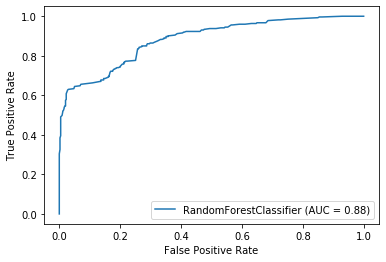

In [134]:
metrics.plot_roc_curve(rf,X_train, y_train)

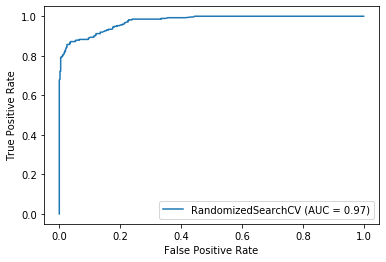

In [135]:
metrics.plot_roc_curve(rs,X_train, y_train)

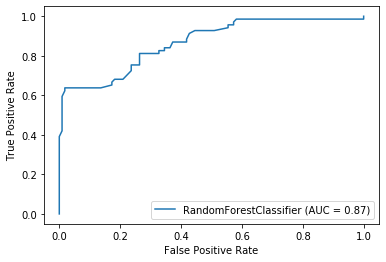

In [136]:
metrics.plot_roc_curve(rf,X_val, y_val)

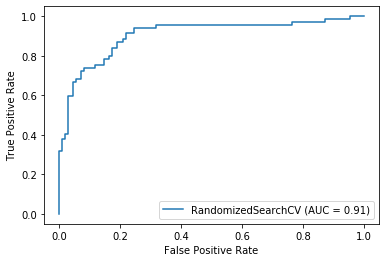

In [137]:
metrics.plot_roc_curve(rs,X_val, y_val)

In [138]:
from statsmodels.api import OLS, qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

D:\AI\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [139]:
vif=pd.DataFrame()
vif['Vif Factor']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Features']=X_train.columns
vif

,Vif Factor,Features
0,5.798583,Pclass
1,1.162305,Age_median_rs
2,1.696415,SibSp_mm
3,1.725985,Parch_mm
4,3.037803,Sex_le
5,4.433758,Embarked_le
6,1.497612,log_Fare_rs


In [140]:
X4=train[['Age_median_rs', 'SibSp_mm', 'Parch_mm', 'Sex_le', 'Embarked_le', 'log_Fare']]

In [141]:
X_train, X_val, y_train, y_val=model_selection.train_test_split(X4, y, test_size=0.2, random_state=0)

In [142]:
X4.shape

(891, 6)

In [143]:
randomisedSearch(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1400, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1400, max_depth=12, criterion=entropy, score=0.790, total=   4.2s
[CV] n_estimators=1400, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=12, criterion=entropy, score=0.818, total=   3.9s
[CV] n_estimators=1400, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=12, criterion=entropy, score=0.803, total=   5.0s
[CV] n_estimators=1400, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.0s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=12, criterion=entropy, score=0.810, total=   4.2s
[CV] n_estimators=1400, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.2s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=12, criterion=entropy, score=0.817, total=   4.0s
[CV] n_estimators=1400, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=4, criterion=gini, score=0.769, total=   3.3s
[CV] n_estimators=1400, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=4, criterion=gini, score=0.839, total=   3.9s
[CV] n_estimators=1400, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=4, criterion=gini, score=0.803, total=   3.2s
[CV] n_estimators=1400, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=4, criterion=gini, score=0.817, total=   3.1s
[CV] n_estimators=1400, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1400, max_depth=4, criterion=gini, score=0.845, total=   3.1s
[CV] n_estimators=100, max_depth=9, criterion=gini ...................
[CV]  n_estimators=100, max_depth=9, criterion=gini, score=0.783, total=   0.2s
[CV]

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


0.8300561797752809
0.8100558659217877


ValueError: Number of features of the model must match the input. Model n_features is 6 and input n_features is 7 

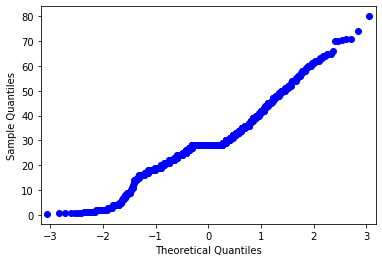

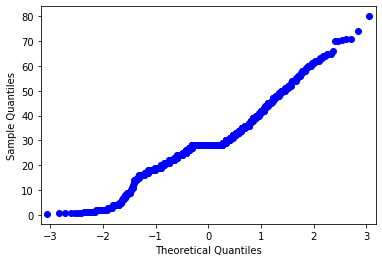

In [144]:
qqplot(train['Age_median'])

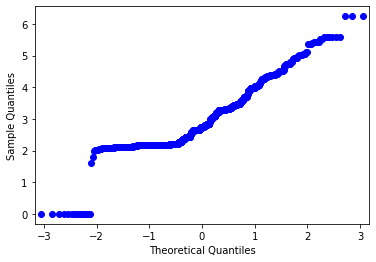

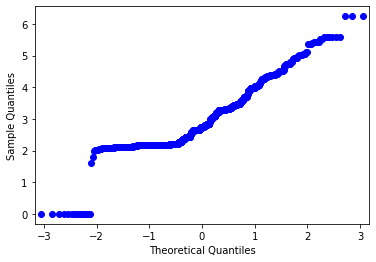

In [145]:
qqplot(train['log_Fare'])

In [147]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_median_mab,Age_median_rs,SibSp_sc,SibSp_mm,SibSp_mab,SibSp_rs,Parch_sc,Parch_mm,Parch_mab,Parch_rs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.2750,-0.461538,0.432793,0.125,0.125,1.0,-0.473674,0.000000,0.000000,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.4750,0.769231,0.432793,0.125,0.125,1.0,-0.473674,0.000000,0.000000,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.3250,-0.153846,-0.474545,0.000,0.000,0.0,-0.473674,0.000000,0.000000,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.4375,0.538462,0.432793,0.125,0.125,1.0,-0.473674,0.000000,0.000000,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.4375,0.538462,-0.474545,0.000,0.000,0.0,-0.473674,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0.3375,-0.076923,-0.474545,0.000,0.000,0.0,-0.473674,0.000000,0.000000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0.2375,-0.692308,-0.474545,0.000,0.000,0.0,-0.473674,0.000000,0.000000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0.3500,0.000000,0.432793,0.125,0.125,1.0,2.008933,0.333333,0.333333,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0.3250,-0.153846,-0.474545,0.000,0.000,0.0,-0.473674,0.000000,0.000000,0.0


In [148]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Age_rs',
       'Fare_median', 'Fare_rs', 'Sex_le', 'Embarked_le', 'Fare_median_sc',
       'Fare_median_mm', 'Fare_median_mab', 'Fare_median_rs', 'Fare_Poly',
       'log_Fare', 'log_Fare_sc', 'log_Fare_mm', 'log_Fare_mab', 'log_Fare_rs',
       'Age_median_sc', 'Age_median_mm', 'Age_median_mab', 'Age_median_rs',
       'SibSp_sc', 'SibSp_mm', 'SibSp_mab', 'SibSp_rs', 'Parch_sc', 'Parch_mm',
       'Parch_mab', 'Parch_rs'],
      dtype='object')

In [152]:
train=train[['log_Fare_sc', 'SibSp_sc', 'Parch_sc', 'Pclass', 'Sex_le', 'Embarked_le']]
test=test[train.columns]

In [200]:
def createNN():
    model=keras.models.Sequential()
    model.add(keras.layers.Dense(12, activation='relu', input_dim=6))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
    return model

In [202]:
model=keras.wrappers.scikit_learn.KerasClassifier(createNN)

In [203]:
batch_size=[16,32,48]
epochs=[30, 60, 90]

param_grid=dict(batch_size=batch_size, epochs=epochs)

In [204]:
gs=model_selection.GridSearchCV(estimator=model, param_grid=param_grid)

In [205]:
gs.fit(X_train, y_train)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_44 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________
Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 535us/step - loss: 0.7035 - accuracy: 0.6166 - val_loss: 0.7217 - val_accuracy: 0.6145
Epoch 2/100
712/712 [==============================] - 0s 63us

712/712 [==============================] - 0s 96us/step - loss: 0.4345 - accuracy: 0.8202 - val_loss: 0.4097 - val_accuracy: 0.8101
Epoch 52/100
712/712 [==============================] - 0s 84us/step - loss: 0.4349 - accuracy: 0.8216 - val_loss: 0.4103 - val_accuracy: 0.8045
Epoch 53/100
712/712 [==============================] - 0s 73us/step - loss: 0.4336 - accuracy: 0.8216 - val_loss: 0.4100 - val_accuracy: 0.7933
Epoch 54/100
712/712 [==============================] - 0s 88us/step - loss: 0.4352 - accuracy: 0.8188 - val_loss: 0.4088 - val_accuracy: 0.8101
Epoch 55/100
712/712 [==============================] - 0s 85us/step - loss: 0.4331 - accuracy: 0.8202 - val_loss: 0.4078 - val_accuracy: 0.7989
Epoch 56/100
712/712 [==============================] - 0s 90us/step - loss: 0.4335 - accuracy: 0.8202 - val_loss: 0.4086 - val_accuracy: 0.7989
Epoch 57/100
712/712 [==============================] - 0s 79us/step - loss: 0.4324 - accuracy: 0.8202 - val_loss: 0.4115 - val_accuracy: 0.787

569/569 [==============================] - 0s 153us/step - loss: 0.4006 - accuracy: 0.8330
Epoch 10/30
569/569 [==============================] - 0s 168us/step - loss: 0.4089 - accuracy: 0.8313
Epoch 11/30
569/569 [==============================] - 0s 143us/step - loss: 0.4037 - accuracy: 0.8313
Epoch 12/30
569/569 [==============================] - 0s 171us/step - loss: 0.4016 - accuracy: 0.8383
Epoch 13/30
569/569 [==============================] - 0s 157us/step - loss: 0.4013 - accuracy: 0.8366
Epoch 14/30
569/569 [==============================] - 0s 166us/step - loss: 0.4031 - accuracy: 0.8330
Epoch 15/30
569/569 [==============================] - 0s 167us/step - loss: 0.4020 - accuracy: 0.8366
Epoch 16/30
569/569 [==============================] - 0s 162us/step - loss: 0.4007 - accuracy: 0.8383
Epoch 17/30
569/569 [==============================] - 0s 162us/step - loss: 0.4019 - accuracy: 0.8330
Epoch 18/30
569/569 [==============================] - 0s 183us/step - loss: 0.3998 -

712/712 [==============================] - 0s 73us/step - loss: 0.4518 - accuracy: 0.8146 - val_loss: 0.4297 - val_accuracy: 0.8045
Epoch 36/100
712/712 [==============================] - 0s 78us/step - loss: 0.4496 - accuracy: 0.8118 - val_loss: 0.4265 - val_accuracy: 0.7989
Epoch 37/100
712/712 [==============================] - 0s 80us/step - loss: 0.4491 - accuracy: 0.8160 - val_loss: 0.4234 - val_accuracy: 0.7989
Epoch 38/100
712/712 [==============================] - 0s 82us/step - loss: 0.4460 - accuracy: 0.8132 - val_loss: 0.4239 - val_accuracy: 0.7989
Epoch 39/100
712/712 [==============================] - 0s 83us/step - loss: 0.4453 - accuracy: 0.8160 - val_loss: 0.4228 - val_accuracy: 0.7989
Epoch 40/100
712/712 [==============================] - 0s 77us/step - loss: 0.4462 - accuracy: 0.8090 - val_loss: 0.4187 - val_accuracy: 0.7933
Epoch 41/100
712/712 [==============================] - 0s 73us/step - loss: 0.4461 - accuracy: 0.8132 - val_loss: 0.4182 - val_accuracy: 0.793

712/712 [==============================] - 0s 117us/step - loss: 0.4152 - accuracy: 0.8315 - val_loss: 0.3894 - val_accuracy: 0.8156
Epoch 92/100
712/712 [==============================] - 0s 111us/step - loss: 0.4154 - accuracy: 0.8287 - val_loss: 0.3897 - val_accuracy: 0.8101
Epoch 93/100
712/712 [==============================] - 0s 111us/step - loss: 0.4148 - accuracy: 0.8287 - val_loss: 0.3895 - val_accuracy: 0.8156
Epoch 94/100
712/712 [==============================] - 0s 115us/step - loss: 0.4174 - accuracy: 0.8329 - val_loss: 0.3893 - val_accuracy: 0.8156
Epoch 95/100
712/712 [==============================] - 0s 96us/step - loss: 0.4144 - accuracy: 0.8301 - val_loss: 0.3902 - val_accuracy: 0.8156
Epoch 96/100
712/712 [==============================] - 0s 129us/step - loss: 0.4151 - accuracy: 0.8315 - val_loss: 0.3918 - val_accuracy: 0.8101
Epoch 97/100
712/712 [==============================] - 0s 133us/step - loss: 0.4165 - accuracy: 0.8287 - val_loss: 0.3950 - val_accuracy:

712/712 [==============================] - 0s 81us/step - loss: 0.4769 - accuracy: 0.7935 - val_loss: 0.4384 - val_accuracy: 0.7989
Epoch 20/100
712/712 [==============================] - 0s 74us/step - loss: 0.4696 - accuracy: 0.7851 - val_loss: 0.4308 - val_accuracy: 0.7877
Epoch 21/100
712/712 [==============================] - 0s 77us/step - loss: 0.4711 - accuracy: 0.7865 - val_loss: 0.4274 - val_accuracy: 0.7933
Epoch 22/100
712/712 [==============================] - 0s 63us/step - loss: 0.4672 - accuracy: 0.7907 - val_loss: 0.4283 - val_accuracy: 0.7821
Epoch 23/100
712/712 [==============================] - 0s 78us/step - loss: 0.4660 - accuracy: 0.7837 - val_loss: 0.4272 - val_accuracy: 0.7933
Epoch 24/100
712/712 [==============================] - 0s 71us/step - loss: 0.4674 - accuracy: 0.7851 - val_loss: 0.4271 - val_accuracy: 0.7933
Epoch 25/100
712/712 [==============================] - 0s 69us/step - loss: 0.4631 - accuracy: 0.7851 - val_loss: 0.4305 - val_accuracy: 0.787

712/712 [==============================] - 0s 73us/step - loss: 0.4307 - accuracy: 0.8160 - val_loss: 0.3968 - val_accuracy: 0.8212
Epoch 76/100
712/712 [==============================] - 0s 66us/step - loss: 0.4331 - accuracy: 0.8202 - val_loss: 0.3958 - val_accuracy: 0.8101
Epoch 77/100
712/712 [==============================] - 0s 99us/step - loss: 0.4319 - accuracy: 0.8188 - val_loss: 0.3953 - val_accuracy: 0.8156
Epoch 78/100
712/712 [==============================] - 0s 85us/step - loss: 0.4326 - accuracy: 0.8132 - val_loss: 0.3961 - val_accuracy: 0.8101
Epoch 79/100
712/712 [==============================] - 0s 85us/step - loss: 0.4315 - accuracy: 0.8174 - val_loss: 0.3943 - val_accuracy: 0.8045
Epoch 80/100
712/712 [==============================] - 0s 78us/step - loss: 0.4314 - accuracy: 0.8160 - val_loss: 0.3943 - val_accuracy: 0.8156
Epoch 81/100
712/712 [==============================] - 0s 82us/step - loss: 0.4328 - accuracy: 0.8146 - val_loss: 0.3956 - val_accuracy: 0.804

712/712 [==============================] - 0s 93us/step - loss: 0.6643 - accuracy: 0.6180 - val_loss: 0.6649 - val_accuracy: 0.6145
Epoch 4/100
712/712 [==============================] - 0s 109us/step - loss: 0.6564 - accuracy: 0.6166 - val_loss: 0.6559 - val_accuracy: 0.6145
Epoch 5/100
712/712 [==============================] - 0s 118us/step - loss: 0.6471 - accuracy: 0.6250 - val_loss: 0.6442 - val_accuracy: 0.6313
Epoch 6/100
712/712 [==============================] - 0s 112us/step - loss: 0.6353 - accuracy: 0.6376 - val_loss: 0.6309 - val_accuracy: 0.6536
Epoch 7/100
712/712 [==============================] - 0s 109us/step - loss: 0.6220 - accuracy: 0.6545 - val_loss: 0.6127 - val_accuracy: 0.6760
Epoch 8/100
712/712 [==============================] - 0s 97us/step - loss: 0.6048 - accuracy: 0.6812 - val_loss: 0.5892 - val_accuracy: 0.7151
Epoch 9/100
712/712 [==============================] - 0s 98us/step - loss: 0.5836 - accuracy: 0.6966 - val_loss: 0.5606 - val_accuracy: 0.7430


712/712 [==============================] - 0s 109us/step - loss: 0.4393 - accuracy: 0.8104 - val_loss: 0.3943 - val_accuracy: 0.7989
Epoch 60/100
712/712 [==============================] - 0s 92us/step - loss: 0.4381 - accuracy: 0.8104 - val_loss: 0.3927 - val_accuracy: 0.8045
Epoch 61/100
712/712 [==============================] - 0s 99us/step - loss: 0.4371 - accuracy: 0.8104 - val_loss: 0.3937 - val_accuracy: 0.8045
Epoch 62/100
712/712 [==============================] - 0s 101us/step - loss: 0.4369 - accuracy: 0.8104 - val_loss: 0.3930 - val_accuracy: 0.8101
Epoch 63/100
712/712 [==============================] - 0s 95us/step - loss: 0.4369 - accuracy: 0.8118 - val_loss: 0.3912 - val_accuracy: 0.8156
Epoch 64/100
712/712 [==============================] - 0s 119us/step - loss: 0.4361 - accuracy: 0.8104 - val_loss: 0.3918 - val_accuracy: 0.8045
Epoch 65/100
712/712 [==============================] - 0s 98us/step - loss: 0.4401 - accuracy: 0.8132 - val_loss: 0.3924 - val_accuracy: 0.

570/570 [==============================] - 0s 147us/step - loss: 0.4303 - accuracy: 0.8193
Epoch 22/30
570/570 [==============================] - 0s 138us/step - loss: 0.4246 - accuracy: 0.8140
Epoch 23/30
570/570 [==============================] - 0s 152us/step - loss: 0.4317 - accuracy: 0.8123
Epoch 24/30
570/570 [==============================] - 0s 153us/step - loss: 0.4260 - accuracy: 0.8193
Epoch 25/30
570/570 [==============================] - 0s 168us/step - loss: 0.4252 - accuracy: 0.8193
Epoch 26/30
570/570 [==============================] - 0s 230us/step - loss: 0.4236 - accuracy: 0.8140
Epoch 27/30
570/570 [==============================] - 0s 139us/step - loss: 0.4239 - accuracy: 0.8158
Epoch 28/30
570/570 [==============================] - 0s 157us/step - loss: 0.4251 - accuracy: 0.8175
Epoch 29/30
570/570 [==============================] - 0s 163us/step - loss: 0.4242 - accuracy: 0.8175
Epoch 30/30
142/142 [==============================] - 0s 138us/step
Model: "sequenti

Epoch 44/100
712/712 [==============================] - 0s 87us/step - loss: 0.4497 - accuracy: 0.8034 - val_loss: 0.4083 - val_accuracy: 0.8045
Epoch 45/100
712/712 [==============================] - 0s 88us/step - loss: 0.4539 - accuracy: 0.8034 - val_loss: 0.4036 - val_accuracy: 0.7989
Epoch 46/100
712/712 [==============================] - 0s 84us/step - loss: 0.4490 - accuracy: 0.7992 - val_loss: 0.4068 - val_accuracy: 0.8045
Epoch 47/100
712/712 [==============================] - 0s 78us/step - loss: 0.4484 - accuracy: 0.8076 - val_loss: 0.4054 - val_accuracy: 0.7877
Epoch 48/100
712/712 [==============================] - 0s 82us/step - loss: 0.4471 - accuracy: 0.8048 - val_loss: 0.4026 - val_accuracy: 0.7877
Epoch 49/100
712/712 [==============================] - 0s 78us/step - loss: 0.4464 - accuracy: 0.8090 - val_loss: 0.4014 - val_accuracy: 0.8045
Epoch 50/100
712/712 [==============================] - 0s 77us/step - loss: 0.4455 - accuracy: 0.8048 - val_loss: 0.4017 - val_ac

712/712 [==============================] - 0s 78us/step - loss: 0.4328 - accuracy: 0.8202 - val_loss: 0.3851 - val_accuracy: 0.8212
Epoch 1/30
570/570 [==============================] - 0s 139us/step - loss: 0.4310 - accuracy: 0.8211
Epoch 2/30
570/570 [==============================] - 0s 129us/step - loss: 0.4350 - accuracy: 0.8211
Epoch 3/30
570/570 [==============================] - 0s 131us/step - loss: 0.4314 - accuracy: 0.8263
Epoch 4/30
570/570 [==============================] - 0s 138us/step - loss: 0.4325 - accuracy: 0.8193
Epoch 5/30
570/570 [==============================] - 0s 148us/step - loss: 0.4324 - accuracy: 0.8211
Epoch 6/30
570/570 [==============================] - 0s 147us/step - loss: 0.4302 - accuracy: 0.8281
Epoch 7/30
570/570 [==============================] - 0s 165us/step - loss: 0.4306 - accuracy: 0.8281
Epoch 8/30
570/570 [==============================] - 0s 145us/step - loss: 0.4286 - accuracy: 0.8246
Epoch 9/30
570/570 [==============================] 

712/712 [==============================] - 0s 84us/step - loss: 0.4811 - accuracy: 0.7865 - val_loss: 0.4459 - val_accuracy: 0.7877
Epoch 29/100
712/712 [==============================] - 0s 86us/step - loss: 0.4772 - accuracy: 0.7879 - val_loss: 0.4444 - val_accuracy: 0.7821
Epoch 30/100
712/712 [==============================] - 0s 79us/step - loss: 0.4779 - accuracy: 0.7851 - val_loss: 0.4437 - val_accuracy: 0.7821
Epoch 31/100
712/712 [==============================] - 0s 86us/step - loss: 0.4765 - accuracy: 0.7823 - val_loss: 0.4421 - val_accuracy: 0.7933
Epoch 32/100
712/712 [==============================] - 0s 104us/step - loss: 0.4746 - accuracy: 0.7865 - val_loss: 0.4407 - val_accuracy: 0.7877
Epoch 33/100
712/712 [==============================] - 0s 81us/step - loss: 0.4791 - accuracy: 0.7809 - val_loss: 0.4408 - val_accuracy: 0.7877
Epoch 34/100
712/712 [==============================] - 0s 84us/step - loss: 0.4731 - accuracy: 0.7921 - val_loss: 0.4392 - val_accuracy: 0.78

712/712 [==============================] - 0s 84us/step - loss: 0.4429 - accuracy: 0.8076 - val_loss: 0.4140 - val_accuracy: 0.8045
Epoch 85/100
712/712 [==============================] - 0s 90us/step - loss: 0.4415 - accuracy: 0.8076 - val_loss: 0.4113 - val_accuracy: 0.7933
Epoch 86/100
712/712 [==============================] - 0s 100us/step - loss: 0.4409 - accuracy: 0.8104 - val_loss: 0.4124 - val_accuracy: 0.7989
Epoch 87/100
712/712 [==============================] - 0s 97us/step - loss: 0.4400 - accuracy: 0.8090 - val_loss: 0.4133 - val_accuracy: 0.7989
Epoch 88/100
712/712 [==============================] - 0s 80us/step - loss: 0.4414 - accuracy: 0.8062 - val_loss: 0.4118 - val_accuracy: 0.7989
Epoch 89/100
712/712 [==============================] - 0s 78us/step - loss: 0.4454 - accuracy: 0.8076 - val_loss: 0.4143 - val_accuracy: 0.7989
Epoch 90/100
712/712 [==============================] - 0s 81us/step - loss: 0.4419 - accuracy: 0.8118 - val_loss: 0.4140 - val_accuracy: 0.80

569/569 [==============================] - 0s 135us/step - loss: 0.4064 - accuracy: 0.8260
Epoch 57/60
569/569 [==============================] - 0s 131us/step - loss: 0.4014 - accuracy: 0.8207
Epoch 58/60
569/569 [==============================] - 0s 161us/step - loss: 0.4055 - accuracy: 0.8243
Epoch 59/60
569/569 [==============================] - 0s 180us/step - loss: 0.4022 - accuracy: 0.8225
Epoch 60/60
143/143 [==============================] - 0s 123us/step
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_68 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_69 (Dense)             (None, 10)                110       
______________________________________________

Epoch 47/100
712/712 [==============================] - 0s 81us/step - loss: 0.4512 - accuracy: 0.7865 - val_loss: 0.4097 - val_accuracy: 0.7821
Epoch 48/100
712/712 [==============================] - 0s 82us/step - loss: 0.4498 - accuracy: 0.7907 - val_loss: 0.4114 - val_accuracy: 0.7821
Epoch 49/100
712/712 [==============================] - 0s 80us/step - loss: 0.4496 - accuracy: 0.7893 - val_loss: 0.4124 - val_accuracy: 0.7765
Epoch 50/100
712/712 [==============================] - 0s 76us/step - loss: 0.4516 - accuracy: 0.7935 - val_loss: 0.4102 - val_accuracy: 0.7821
Epoch 51/100
712/712 [==============================] - 0s 76us/step - loss: 0.4500 - accuracy: 0.7879 - val_loss: 0.4116 - val_accuracy: 0.7821
Epoch 52/100
712/712 [==============================] - 0s 78us/step - loss: 0.4504 - accuracy: 0.7851 - val_loss: 0.4134 - val_accuracy: 0.7765
Epoch 53/100
712/712 [==============================] - 0s 79us/step - loss: 0.4486 - accuracy: 0.7865 - val_loss: 0.4111 - val_ac

569/569 [==============================] - 0s 143us/step - loss: 0.4518 - accuracy: 0.7979
Epoch 5/60
569/569 [==============================] - 0s 132us/step - loss: 0.4434 - accuracy: 0.8014
Epoch 6/60
569/569 [==============================] - 0s 143us/step - loss: 0.4434 - accuracy: 0.7996
Epoch 7/60
569/569 [==============================] - 0s 190us/step - loss: 0.4410 - accuracy: 0.7979
Epoch 8/60
569/569 [==============================] - 0s 146us/step - loss: 0.4425 - accuracy: 0.8014
Epoch 9/60
569/569 [==============================] - 0s 179us/step - loss: 0.4389 - accuracy: 0.7979
Epoch 10/60
569/569 [==============================] - 0s 135us/step - loss: 0.4400 - accuracy: 0.7961
Epoch 11/60
569/569 [==============================] - 0s 148us/step - loss: 0.4436 - accuracy: 0.8014
Epoch 12/60
569/569 [==============================] - 0s 133us/step - loss: 0.4398 - accuracy: 0.7961
Epoch 13/60
569/569 [==============================] - 0s 173us/step - loss: 0.4391 - accu

712/712 [==============================] - 0s 78us/step - loss: 0.5230 - accuracy: 0.7739 - val_loss: 0.4769 - val_accuracy: 0.7933
Epoch 11/100
712/712 [==============================] - 0s 113us/step - loss: 0.5057 - accuracy: 0.7823 - val_loss: 0.4606 - val_accuracy: 0.7877
Epoch 12/100
712/712 [==============================] - 0s 109us/step - loss: 0.4940 - accuracy: 0.7823 - val_loss: 0.4503 - val_accuracy: 0.7877
Epoch 13/100
712/712 [==============================] - 0s 96us/step - loss: 0.4901 - accuracy: 0.7837 - val_loss: 0.4431 - val_accuracy: 0.7765
Epoch 14/100
712/712 [==============================] - 0s 99us/step - loss: 0.4858 - accuracy: 0.7865 - val_loss: 0.4401 - val_accuracy: 0.7877
Epoch 15/100
712/712 [==============================] - 0s 93us/step - loss: 0.4786 - accuracy: 0.7823 - val_loss: 0.4353 - val_accuracy: 0.7877
Epoch 16/100
712/712 [==============================] - 0s 93us/step - loss: 0.4749 - accuracy: 0.7851 - val_loss: 0.4348 - val_accuracy: 0.7

712/712 [==============================] - 0s 78us/step - loss: 0.4335 - accuracy: 0.8118 - val_loss: 0.3959 - val_accuracy: 0.8156
Epoch 67/100
712/712 [==============================] - 0s 80us/step - loss: 0.4336 - accuracy: 0.8132 - val_loss: 0.3959 - val_accuracy: 0.8101
Epoch 68/100
712/712 [==============================] - 0s 81us/step - loss: 0.4330 - accuracy: 0.8104 - val_loss: 0.3971 - val_accuracy: 0.8156
Epoch 69/100
712/712 [==============================] - 0s 81us/step - loss: 0.4318 - accuracy: 0.8146 - val_loss: 0.3954 - val_accuracy: 0.8156
Epoch 70/100
712/712 [==============================] - 0s 77us/step - loss: 0.4323 - accuracy: 0.8104 - val_loss: 0.3928 - val_accuracy: 0.8156
Epoch 71/100
712/712 [==============================] - 0s 87us/step - loss: 0.4347 - accuracy: 0.8020 - val_loss: 0.3974 - val_accuracy: 0.8101
Epoch 72/100
712/712 [==============================] - 0s 80us/step - loss: 0.4393 - accuracy: 0.8301 - val_loss: 0.3961 - val_accuracy: 0.826

570/570 [==============================] - 0s 137us/step - loss: 0.4151 - accuracy: 0.8175
Epoch 32/60
570/570 [==============================] - 0s 122us/step - loss: 0.4157 - accuracy: 0.8140
Epoch 33/60
570/570 [==============================] - 0s 132us/step - loss: 0.4130 - accuracy: 0.8228
Epoch 34/60
570/570 [==============================] - 0s 143us/step - loss: 0.4159 - accuracy: 0.8123
Epoch 35/60
570/570 [==============================] - 0s 146us/step - loss: 0.4119 - accuracy: 0.8211
Epoch 36/60
570/570 [==============================] - 0s 127us/step - loss: 0.4113 - accuracy: 0.8228
Epoch 37/60
570/570 [==============================] - 0s 145us/step - loss: 0.4098 - accuracy: 0.8211
Epoch 38/60
570/570 [==============================] - 0s 142us/step - loss: 0.4098 - accuracy: 0.8158
Epoch 39/60
570/570 [==============================] - 0s 148us/step - loss: 0.4132 - accuracy: 0.8263
Epoch 40/60
570/570 [==============================] - 0s 122us/step - loss: 0.4090 -

712/712 [==============================] - 0s 80us/step - loss: 0.4679 - accuracy: 0.7893 - val_loss: 0.4324 - val_accuracy: 0.7709
Epoch 30/100
712/712 [==============================] - 0s 75us/step - loss: 0.4677 - accuracy: 0.7893 - val_loss: 0.4290 - val_accuracy: 0.7821
Epoch 31/100
712/712 [==============================] - 0s 67us/step - loss: 0.4690 - accuracy: 0.7921 - val_loss: 0.4306 - val_accuracy: 0.7933
Epoch 32/100
712/712 [==============================] - 0s 83us/step - loss: 0.4676 - accuracy: 0.7879 - val_loss: 0.4290 - val_accuracy: 0.7933
Epoch 33/100
712/712 [==============================] - 0s 73us/step - loss: 0.4647 - accuracy: 0.7893 - val_loss: 0.4292 - val_accuracy: 0.7877
Epoch 34/100
712/712 [==============================] - 0s 85us/step - loss: 0.4636 - accuracy: 0.7879 - val_loss: 0.4280 - val_accuracy: 0.7709
Epoch 35/100
712/712 [==============================] - 0s 71us/step - loss: 0.4664 - accuracy: 0.7949 - val_loss: 0.4268 - val_accuracy: 0.793

712/712 [==============================] - 0s 82us/step - loss: 0.4451 - accuracy: 0.7978 - val_loss: 0.4092 - val_accuracy: 0.7989
Epoch 86/100
712/712 [==============================] - 0s 90us/step - loss: 0.4450 - accuracy: 0.7992 - val_loss: 0.4081 - val_accuracy: 0.7989
Epoch 87/100
712/712 [==============================] - 0s 93us/step - loss: 0.4437 - accuracy: 0.7963 - val_loss: 0.4079 - val_accuracy: 0.7933
Epoch 88/100
712/712 [==============================] - 0s 80us/step - loss: 0.4456 - accuracy: 0.8006 - val_loss: 0.4108 - val_accuracy: 0.7933
Epoch 89/100
712/712 [==============================] - 0s 106us/step - loss: 0.4441 - accuracy: 0.7978 - val_loss: 0.4126 - val_accuracy: 0.7933
Epoch 90/100
712/712 [==============================] - 0s 96us/step - loss: 0.4458 - accuracy: 0.8034 - val_loss: 0.4134 - val_accuracy: 0.8045
Epoch 91/100
712/712 [==============================] - 0s 108us/step - loss: 0.4484 - accuracy: 0.8020 - val_loss: 0.4073 - val_accuracy: 0.7

570/570 [==============================] - 0s 154us/step - loss: 0.4246 - accuracy: 0.8193
Epoch 59/60
570/570 [==============================] - 0s 139us/step - loss: 0.4176 - accuracy: 0.8193
Epoch 60/60
142/142 [==============================] - 0s 123us/step
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_80 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_81 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 11        
Total params: 335
Trainable params: 335
Non-trainable params: 0
________________________________________________________

Epoch 49/100
712/712 [==============================] - 0s 77us/step - loss: 0.4432 - accuracy: 0.8048 - val_loss: 0.3989 - val_accuracy: 0.8045
Epoch 50/100
712/712 [==============================] - 0s 83us/step - loss: 0.4446 - accuracy: 0.8160 - val_loss: 0.4017 - val_accuracy: 0.8045
Epoch 51/100
712/712 [==============================] - 0s 67us/step - loss: 0.4430 - accuracy: 0.8062 - val_loss: 0.4026 - val_accuracy: 0.8101
Epoch 52/100
712/712 [==============================] - 0s 80us/step - loss: 0.4427 - accuracy: 0.8090 - val_loss: 0.4004 - val_accuracy: 0.8045
Epoch 53/100
712/712 [==============================] - 0s 78us/step - loss: 0.4407 - accuracy: 0.8090 - val_loss: 0.4004 - val_accuracy: 0.8045
Epoch 54/100
712/712 [==============================] - 0s 74us/step - loss: 0.4436 - accuracy: 0.8090 - val_loss: 0.4013 - val_accuracy: 0.8156
Epoch 55/100
712/712 [==============================] - 0s 86us/step - loss: 0.4410 - accuracy: 0.8118 - val_loss: 0.3981 - val_ac

Epoch 7/60
570/570 [==============================] - 0s 148us/step - loss: 0.4342 - accuracy: 0.8211
Epoch 8/60
570/570 [==============================] - 0s 162us/step - loss: 0.4268 - accuracy: 0.8263
Epoch 9/60
570/570 [==============================] - 0s 151us/step - loss: 0.4310 - accuracy: 0.8246
Epoch 10/60
570/570 [==============================] - ETA: 0s - loss: 0.4300 - accuracy: 0.81 - 0s 155us/step - loss: 0.4273 - accuracy: 0.8246
Epoch 11/60
570/570 [==============================] - 0s 153us/step - loss: 0.4281 - accuracy: 0.8228
Epoch 12/60
570/570 [==============================] - 0s 144us/step - loss: 0.4282 - accuracy: 0.8175
Epoch 13/60
570/570 [==============================] - 0s 152us/step - loss: 0.4268 - accuracy: 0.8140
Epoch 14/60
570/570 [==============================] - 0s 141us/step - loss: 0.4294 - accuracy: 0.8228
Epoch 15/60
570/570 [==============================] - 0s 145us/step - loss: 0.4258 - accuracy: 0.8281
Epoch 16/60
570/570 [=============

712/712 [==============================] - 0s 77us/step - loss: 0.5020 - accuracy: 0.7851 - val_loss: 0.4769 - val_accuracy: 0.7765
Epoch 13/100
712/712 [==============================] - 0s 76us/step - loss: 0.4974 - accuracy: 0.7851 - val_loss: 0.4701 - val_accuracy: 0.7765
Epoch 14/100
712/712 [==============================] - 0s 76us/step - loss: 0.4948 - accuracy: 0.7851 - val_loss: 0.4670 - val_accuracy: 0.7765
Epoch 15/100
712/712 [==============================] - 0s 80us/step - loss: 0.4911 - accuracy: 0.7865 - val_loss: 0.4625 - val_accuracy: 0.7765
Epoch 16/100
712/712 [==============================] - 0s 77us/step - loss: 0.4892 - accuracy: 0.7851 - val_loss: 0.4585 - val_accuracy: 0.7933
Epoch 17/100
712/712 [==============================] - 0s 84us/step - loss: 0.4875 - accuracy: 0.7907 - val_loss: 0.4560 - val_accuracy: 0.7709
Epoch 18/100
712/712 [==============================] - 0s 68us/step - loss: 0.4872 - accuracy: 0.7865 - val_loss: 0.4543 - val_accuracy: 0.793

712/712 [==============================] - 0s 82us/step - loss: 0.4351 - accuracy: 0.8118 - val_loss: 0.3927 - val_accuracy: 0.7933
Epoch 69/100
712/712 [==============================] - 0s 81us/step - loss: 0.4349 - accuracy: 0.8146 - val_loss: 0.3932 - val_accuracy: 0.7933
Epoch 70/100
712/712 [==============================] - 0s 80us/step - loss: 0.4329 - accuracy: 0.8132 - val_loss: 0.3941 - val_accuracy: 0.8045
Epoch 71/100
712/712 [==============================] - 0s 77us/step - loss: 0.4329 - accuracy: 0.8076 - val_loss: 0.3920 - val_accuracy: 0.8045
Epoch 72/100
712/712 [==============================] - 0s 69us/step - loss: 0.4314 - accuracy: 0.8132 - val_loss: 0.3964 - val_accuracy: 0.8101
Epoch 73/100
712/712 [==============================] - 0s 79us/step - loss: 0.4318 - accuracy: 0.8090 - val_loss: 0.3916 - val_accuracy: 0.7989
Epoch 74/100
712/712 [==============================] - 0s 74us/step - loss: 0.4315 - accuracy: 0.8132 - val_loss: 0.3936 - val_accuracy: 0.804

569/569 [==============================] - 0s 174us/step - loss: 0.3958 - accuracy: 0.8225
Epoch 35/90
569/569 [==============================] - 0s 148us/step - loss: 0.3979 - accuracy: 0.8190
Epoch 36/90
569/569 [==============================] - 0s 173us/step - loss: 0.3968 - accuracy: 0.8260
Epoch 37/90
569/569 [==============================] - 0s 157us/step - loss: 0.4013 - accuracy: 0.8278
Epoch 38/90
569/569 [==============================] - 0s 176us/step - loss: 0.3958 - accuracy: 0.8260
Epoch 39/90
569/569 [==============================] - 0s 168us/step - loss: 0.3929 - accuracy: 0.8278
Epoch 40/90
569/569 [==============================] - 0s 158us/step - loss: 0.3941 - accuracy: 0.8278
Epoch 41/90
569/569 [==============================] - 0s 154us/step - loss: 0.3945 - accuracy: 0.8313
Epoch 42/90
569/569 [==============================] - 0s 163us/step - loss: 0.3922 - accuracy: 0.8225
Epoch 43/90
569/569 [==============================] - 0s 156us/step - loss: 0.3950 -

712/712 [==============================] - 0s 78us/step - loss: 0.4879 - accuracy: 0.7837 - val_loss: 0.4442 - val_accuracy: 0.7877
Epoch 11/100
712/712 [==============================] - ETA: 0s - loss: 0.4827 - accuracy: 0.78 - 0s 93us/step - loss: 0.4815 - accuracy: 0.7837 - val_loss: 0.4374 - val_accuracy: 0.7765
Epoch 12/100
712/712 [==============================] - 0s 83us/step - loss: 0.4778 - accuracy: 0.7893 - val_loss: 0.4351 - val_accuracy: 0.7765
Epoch 13/100
712/712 [==============================] - 0s 76us/step - loss: 0.4743 - accuracy: 0.7907 - val_loss: 0.4317 - val_accuracy: 0.7821
Epoch 14/100
712/712 [==============================] - 0s 76us/step - loss: 0.4727 - accuracy: 0.7935 - val_loss: 0.4308 - val_accuracy: 0.7821
Epoch 15/100
712/712 [==============================] - 0s 70us/step - loss: 0.4733 - accuracy: 0.7907 - val_loss: 0.4310 - val_accuracy: 0.7821
Epoch 16/100
712/712 [==============================] - 0s 72us/step - loss: 0.4698 - accuracy: 0.789

712/712 [==============================] - 0s 63us/step - loss: 0.4431 - accuracy: 0.7992 - val_loss: 0.4065 - val_accuracy: 0.8045
Epoch 67/100
712/712 [==============================] - 0s 83us/step - loss: 0.4424 - accuracy: 0.8034 - val_loss: 0.4089 - val_accuracy: 0.8045
Epoch 68/100
712/712 [==============================] - 0s 73us/step - loss: 0.4435 - accuracy: 0.8062 - val_loss: 0.4093 - val_accuracy: 0.7989
Epoch 69/100
712/712 [==============================] - 0s 80us/step - loss: 0.4417 - accuracy: 0.8020 - val_loss: 0.4057 - val_accuracy: 0.8045
Epoch 70/100
712/712 [==============================] - 0s 89us/step - loss: 0.4405 - accuracy: 0.8034 - val_loss: 0.4087 - val_accuracy: 0.8045
Epoch 71/100
712/712 [==============================] - 0s 81us/step - loss: 0.4416 - accuracy: 0.8062 - val_loss: 0.4095 - val_accuracy: 0.8045
Epoch 72/100
712/712 [==============================] - 0s 82us/step - loss: 0.4413 - accuracy: 0.8048 - val_loss: 0.4068 - val_accuracy: 0.804

569/569 [==============================] - 0s 149us/step - loss: 0.4448 - accuracy: 0.8120
Epoch 32/90
569/569 [==============================] - 0s 162us/step - loss: 0.4405 - accuracy: 0.8172
Epoch 33/90
569/569 [==============================] - 0s 141us/step - loss: 0.4329 - accuracy: 0.8225
Epoch 34/90
569/569 [==============================] - 0s 164us/step - loss: 0.4347 - accuracy: 0.8207
Epoch 35/90
569/569 [==============================] - 0s 161us/step - loss: 0.4314 - accuracy: 0.8225
Epoch 36/90
569/569 [==============================] - 0s 150us/step - loss: 0.4414 - accuracy: 0.8155
Epoch 37/90
569/569 [==============================] - 0s 141us/step - loss: 0.4326 - accuracy: 0.8207
Epoch 38/90
569/569 [==============================] - 0s 148us/step - loss: 0.4352 - accuracy: 0.8243
Epoch 39/90
569/569 [==============================] - 0s 161us/step - loss: 0.4326 - accuracy: 0.8190
Epoch 40/90
569/569 [==============================] - 0s 163us/step - loss: 0.4353 -

712/712 [==============================] - 0s 74us/step - loss: 0.6210 - accuracy: 0.6194 - val_loss: 0.6030 - val_accuracy: 0.6201
Epoch 9/100
712/712 [==============================] - 0s 79us/step - loss: 0.6050 - accuracy: 0.6236 - val_loss: 0.5854 - val_accuracy: 0.6425
Epoch 10/100
712/712 [==============================] - 0s 78us/step - loss: 0.5885 - accuracy: 0.6447 - val_loss: 0.5688 - val_accuracy: 0.6592
Epoch 11/100
712/712 [==============================] - 0s 78us/step - loss: 0.5724 - accuracy: 0.6756 - val_loss: 0.5538 - val_accuracy: 0.7039
Epoch 12/100
712/712 [==============================] - 0s 77us/step - loss: 0.5580 - accuracy: 0.7331 - val_loss: 0.5377 - val_accuracy: 0.7486
Epoch 13/100
712/712 [==============================] - 0s 76us/step - loss: 0.5449 - accuracy: 0.7683 - val_loss: 0.5221 - val_accuracy: 0.7598
Epoch 14/100
712/712 [==============================] - 0s 77us/step - loss: 0.5285 - accuracy: 0.7837 - val_loss: 0.5037 - val_accuracy: 0.7933

712/712 [==============================] - 0s 78us/step - loss: 0.4335 - accuracy: 0.8118 - val_loss: 0.3998 - val_accuracy: 0.8045
Epoch 65/100
712/712 [==============================] - 0s 80us/step - loss: 0.4341 - accuracy: 0.8160 - val_loss: 0.3991 - val_accuracy: 0.7989
Epoch 66/100
712/712 [==============================] - 0s 63us/step - loss: 0.4322 - accuracy: 0.8174 - val_loss: 0.4004 - val_accuracy: 0.8156
Epoch 67/100
712/712 [==============================] - 0s 82us/step - loss: 0.4336 - accuracy: 0.8146 - val_loss: 0.4003 - val_accuracy: 0.8045
Epoch 68/100
712/712 [==============================] - 0s 97us/step - loss: 0.4309 - accuracy: 0.8160 - val_loss: 0.3990 - val_accuracy: 0.8101
Epoch 69/100
712/712 [==============================] - 0s 80us/step - loss: 0.4308 - accuracy: 0.8146 - val_loss: 0.3976 - val_accuracy: 0.7989
Epoch 70/100
712/712 [==============================] - 0s 70us/step - loss: 0.4322 - accuracy: 0.8174 - val_loss: 0.3992 - val_accuracy: 0.810

570/570 [==============================] - 0s 125us/step - loss: 0.4132 - accuracy: 0.8263
Epoch 29/90
570/570 [==============================] - 0s 144us/step - loss: 0.4131 - accuracy: 0.8263
Epoch 30/90
570/570 [==============================] - 0s 128us/step - loss: 0.4125 - accuracy: 0.8316
Epoch 31/90
570/570 [==============================] - ETA: 0s - loss: 0.4183 - accuracy: 0.82 - 0s 123us/step - loss: 0.4111 - accuracy: 0.8298
Epoch 32/90
570/570 [==============================] - 0s 138us/step - loss: 0.4114 - accuracy: 0.8281
Epoch 33/90
570/570 [==============================] - 0s 126us/step - loss: 0.4134 - accuracy: 0.8246
Epoch 34/90
570/570 [==============================] - 0s 142us/step - loss: 0.4095 - accuracy: 0.8333
Epoch 35/90
570/570 [==============================] - 0s 147us/step - loss: 0.4115 - accuracy: 0.8281
Epoch 36/90
570/570 [==============================] - 0s 146us/step - loss: 0.4100 - accuracy: 0.8263
Epoch 37/90
570/570 [======================

712/712 [==============================] - 0s 81us/step - loss: 0.5984 - accuracy: 0.6742 - val_loss: 0.5820 - val_accuracy: 0.7151
Epoch 6/100
712/712 [==============================] - 0s 81us/step - loss: 0.5854 - accuracy: 0.6896 - val_loss: 0.5660 - val_accuracy: 0.6983
Epoch 7/100
712/712 [==============================] - 0s 78us/step - loss: 0.5719 - accuracy: 0.6910 - val_loss: 0.5499 - val_accuracy: 0.7095
Epoch 8/100
712/712 [==============================] - 0s 72us/step - loss: 0.5597 - accuracy: 0.7051 - val_loss: 0.5358 - val_accuracy: 0.7318
Epoch 9/100
712/712 [==============================] - 0s 83us/step - loss: 0.5484 - accuracy: 0.7289 - val_loss: 0.5218 - val_accuracy: 0.7374
Epoch 10/100
712/712 [==============================] - 0s 77us/step - loss: 0.5356 - accuracy: 0.7542 - val_loss: 0.5070 - val_accuracy: 0.7598
Epoch 11/100
712/712 [==============================] - 0s 81us/step - loss: 0.5251 - accuracy: 0.7598 - val_loss: 0.4959 - val_accuracy: 0.7598
Ep

712/712 [==============================] - 0s 78us/step - loss: 0.4409 - accuracy: 0.8132 - val_loss: 0.4216 - val_accuracy: 0.7877
Epoch 62/100
712/712 [==============================] - 0s 68us/step - loss: 0.4406 - accuracy: 0.8090 - val_loss: 0.4216 - val_accuracy: 0.7877
Epoch 63/100
712/712 [==============================] - 0s 70us/step - loss: 0.4403 - accuracy: 0.8160 - val_loss: 0.4203 - val_accuracy: 0.7933
Epoch 64/100
712/712 [==============================] - 0s 68us/step - loss: 0.4392 - accuracy: 0.8104 - val_loss: 0.4211 - val_accuracy: 0.7877
Epoch 65/100
712/712 [==============================] - 0s 70us/step - loss: 0.4379 - accuracy: 0.8160 - val_loss: 0.4215 - val_accuracy: 0.7877
Epoch 66/100
712/712 [==============================] - 0s 79us/step - loss: 0.4380 - accuracy: 0.8132 - val_loss: 0.4195 - val_accuracy: 0.7877
Epoch 67/100
712/712 [==============================] - 0s 83us/step - loss: 0.4378 - accuracy: 0.8118 - val_loss: 0.4181 - val_accuracy: 0.787

570/570 [==============================] - 0s 145us/step - loss: 0.4263 - accuracy: 0.8193
Epoch 23/90
570/570 [==============================] - 0s 143us/step - loss: 0.4280 - accuracy: 0.8105
Epoch 24/90
570/570 [==============================] - 0s 126us/step - loss: 0.4259 - accuracy: 0.8123
Epoch 25/90
570/570 [==============================] - 0s 152us/step - loss: 0.4261 - accuracy: 0.8228
Epoch 26/90
570/570 [==============================] - 0s 117us/step - loss: 0.4244 - accuracy: 0.8193
Epoch 27/90
570/570 [==============================] - 0s 141us/step - loss: 0.4252 - accuracy: 0.8211
Epoch 28/90
570/570 [==============================] - 0s 138us/step - loss: 0.4265 - accuracy: 0.8193
Epoch 29/90
570/570 [==============================] - 0s 136us/step - loss: 0.4242 - accuracy: 0.8175
Epoch 30/90
570/570 [==============================] - 0s 122us/step - loss: 0.4230 - accuracy: 0.8158
Epoch 31/90
570/570 [==============================] - 0s 135us/step - loss: 0.4227 -

Epoch 2/100
712/712 [==============================] - 0s 52us/step - loss: 0.6742 - accuracy: 0.5983 - val_loss: 0.6613 - val_accuracy: 0.6257
Epoch 3/100
712/712 [==============================] - 0s 78us/step - loss: 0.6644 - accuracy: 0.6124 - val_loss: 0.6540 - val_accuracy: 0.6145
Epoch 4/100
712/712 [==============================] - 0s 96us/step - loss: 0.6563 - accuracy: 0.6152 - val_loss: 0.6467 - val_accuracy: 0.6145
Epoch 5/100
712/712 [==============================] - 0s 81us/step - loss: 0.6476 - accuracy: 0.6152 - val_loss: 0.6386 - val_accuracy: 0.6145
Epoch 6/100
712/712 [==============================] - 0s 85us/step - loss: 0.6373 - accuracy: 0.6222 - val_loss: 0.6288 - val_accuracy: 0.6257
Epoch 7/100
712/712 [==============================] - 0s 81us/step - loss: 0.6257 - accuracy: 0.6292 - val_loss: 0.6150 - val_accuracy: 0.6313
Epoch 8/100
712/712 [==============================] - 0s 79us/step - loss: 0.6110 - accuracy: 0.6376 - val_loss: 0.5991 - val_accuracy:

712/712 [==============================] - 0s 79us/step - loss: 0.4428 - accuracy: 0.7949 - val_loss: 0.4105 - val_accuracy: 0.8101
Epoch 59/100
712/712 [==============================] - 0s 79us/step - loss: 0.4422 - accuracy: 0.8076 - val_loss: 0.4086 - val_accuracy: 0.8045
Epoch 60/100
712/712 [==============================] - 0s 81us/step - loss: 0.4429 - accuracy: 0.7949 - val_loss: 0.4105 - val_accuracy: 0.8156
Epoch 61/100
712/712 [==============================] - 0s 94us/step - loss: 0.4408 - accuracy: 0.8048 - val_loss: 0.4083 - val_accuracy: 0.8101
Epoch 62/100
712/712 [==============================] - 0s 76us/step - loss: 0.4393 - accuracy: 0.7992 - val_loss: 0.4104 - val_accuracy: 0.8045
Epoch 63/100
712/712 [==============================] - 0s 85us/step - loss: 0.4391 - accuracy: 0.8020 - val_loss: 0.4102 - val_accuracy: 0.7989
Epoch 64/100
712/712 [==============================] - 0s 81us/step - loss: 0.4433 - accuracy: 0.7963 - val_loss: 0.4090 - val_accuracy: 0.804

570/570 [==============================] - 0s 125us/step - loss: 0.4238 - accuracy: 0.8158
Epoch 21/90
570/570 [==============================] - 0s 143us/step - loss: 0.4191 - accuracy: 0.8246
Epoch 22/90
570/570 [==============================] - 0s 129us/step - loss: 0.4186 - accuracy: 0.8228
Epoch 23/90
570/570 [==============================] - 0s 127us/step - loss: 0.4246 - accuracy: 0.8246
Epoch 24/90
570/570 [==============================] - 0s 153us/step - loss: 0.4205 - accuracy: 0.8246
Epoch 25/90
570/570 [==============================] - 0s 125us/step - loss: 0.4192 - accuracy: 0.8298
Epoch 26/90
570/570 [==============================] - 0s 145us/step - loss: 0.4221 - accuracy: 0.8211
Epoch 27/90
570/570 [==============================] - 0s 152us/step - loss: 0.4214 - accuracy: 0.8228
Epoch 28/90
570/570 [==============================] - 0s 133us/step - loss: 0.4209 - accuracy: 0.8263
Epoch 29/90
570/570 [==============================] - 0s 125us/step - loss: 0.4206 -

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 500us/step - loss: 0.6619 - accuracy: 0.6166 - val_loss: 0.6503 - val_accuracy: 0.6145
Epoch 2/100
712/712 [==============================] - 0s 65us/step - loss: 0.6481 - accuracy: 0.6166 - val_loss: 0.6370 - val_accuracy: 0.6145
Epoch 3/100
712/712 [==============================] - 0s 91us/step - loss: 0.6361 - accuracy: 0.6166 - val_loss: 0.6234 - val_accuracy: 0.6145
Epoch 4/100
712/712 [==============================] - 0s 81us/step - loss: 0.6248 - accuracy: 0.6166 - val_loss: 0.6103 - val_accuracy: 0.6145
Epoch 5/100
712/712 [==============================] - 0s 75us/step - loss: 0.6114 - accuracy: 0.6166 - val_loss: 0.5981 - val_accuracy: 0.6145
Epoch 6/100
712/712 [==============================] - 0s 79us/step - loss: 0.6016 - accuracy: 0.6166 - val_loss: 0.5866 - val_accuracy: 0.6145
Epoch 7/100
712/712 [==============================] - 0s 78us/step - loss: 0.5905 - accu

712/712 [==============================] - 0s 74us/step - loss: 0.4499 - accuracy: 0.8118 - val_loss: 0.4316 - val_accuracy: 0.8101
Epoch 58/100
712/712 [==============================] - 0s 80us/step - loss: 0.4485 - accuracy: 0.8132 - val_loss: 0.4307 - val_accuracy: 0.8101
Epoch 59/100
712/712 [==============================] - 0s 78us/step - loss: 0.4471 - accuracy: 0.8146 - val_loss: 0.4304 - val_accuracy: 0.8101
Epoch 60/100
712/712 [==============================] - 0s 66us/step - loss: 0.4481 - accuracy: 0.8174 - val_loss: 0.4340 - val_accuracy: 0.8101
Epoch 61/100
712/712 [==============================] - 0s 78us/step - loss: 0.4470 - accuracy: 0.8174 - val_loss: 0.4297 - val_accuracy: 0.8101
Epoch 62/100
712/712 [==============================] - 0s 81us/step - loss: 0.4458 - accuracy: 0.8160 - val_loss: 0.4283 - val_accuracy: 0.8101
Epoch 63/100
712/712 [==============================] - 0s 83us/step - loss: 0.4444 - accuracy: 0.8216 - val_loss: 0.4302 - val_accuracy: 0.810

569/569 [==============================] - 0s 58us/step - loss: 0.4006 - accuracy: 0.8330
Epoch 19/30
569/569 [==============================] - 0s 78us/step - loss: 0.4017 - accuracy: 0.8278
Epoch 20/30
569/569 [==============================] - 0s 66us/step - loss: 0.4012 - accuracy: 0.8313
Epoch 21/30
569/569 [==============================] - 0s 55us/step - loss: 0.3984 - accuracy: 0.8295
Epoch 22/30
569/569 [==============================] - 0s 71us/step - loss: 0.3988 - accuracy: 0.8295
Epoch 23/30
569/569 [==============================] - 0s 72us/step - loss: 0.3978 - accuracy: 0.8295
Epoch 24/30
569/569 [==============================] - 0s 57us/step - loss: 0.3984 - accuracy: 0.8313
Epoch 25/30
569/569 [==============================] - 0s 73us/step - loss: 0.3994 - accuracy: 0.8295
Epoch 26/30
569/569 [==============================] - 0s 77us/step - loss: 0.3977 - accuracy: 0.8295
Epoch 27/30
569/569 [==============================] - 0s 49us/step - loss: 0.3973 - accuracy:

712/712 [==============================] - 0s 96us/step - loss: 0.4394 - accuracy: 0.8104 - val_loss: 0.4065 - val_accuracy: 0.8101
Epoch 42/100
712/712 [==============================] - 0s 101us/step - loss: 0.4412 - accuracy: 0.8076 - val_loss: 0.4024 - val_accuracy: 0.8212
Epoch 43/100
712/712 [==============================] - 0s 108us/step - loss: 0.4412 - accuracy: 0.8118 - val_loss: 0.4060 - val_accuracy: 0.8101
Epoch 44/100
712/712 [==============================] - 0s 82us/step - loss: 0.4376 - accuracy: 0.8090 - val_loss: 0.4023 - val_accuracy: 0.8212
Epoch 45/100
712/712 [==============================] - 0s 77us/step - loss: 0.4400 - accuracy: 0.8104 - val_loss: 0.4024 - val_accuracy: 0.8212
Epoch 46/100
712/712 [==============================] - 0s 73us/step - loss: 0.4375 - accuracy: 0.8160 - val_loss: 0.4023 - val_accuracy: 0.8156
Epoch 47/100
712/712 [==============================] - 0s 96us/step - loss: 0.4403 - accuracy: 0.8090 - val_loss: 0.4018 - val_accuracy: 0.8

712/712 [==============================] - 0s 80us/step - loss: 0.4266 - accuracy: 0.8188 - val_loss: 0.3928 - val_accuracy: 0.8156
Epoch 98/100
712/712 [==============================] - 0s 96us/step - loss: 0.4259 - accuracy: 0.8216 - val_loss: 0.3911 - val_accuracy: 0.8101
Epoch 99/100
712/712 [==============================] - 0s 78us/step - loss: 0.4282 - accuracy: 0.8146 - val_loss: 0.3927 - val_accuracy: 0.8101
Epoch 100/100
712/712 [==============================] - 0s 75us/step - loss: 0.4283 - accuracy: 0.8216 - val_loss: 0.3949 - val_accuracy: 0.8212
Epoch 1/30
569/569 [==============================] - 0s 73us/step - loss: 0.4319 - accuracy: 0.8190
Epoch 2/30
569/569 [==============================] - 0s 63us/step - loss: 0.4318 - accuracy: 0.8120
Epoch 3/30
569/569 [==============================] - 0s 74us/step - loss: 0.4295 - accuracy: 0.8155
Epoch 4/30
569/569 [==============================] - 0s 79us/step - loss: 0.4322 - accuracy: 0.8207
Epoch 5/30
569/569 [========

712/712 [==============================] - 0s 87us/step - loss: 0.4597 - accuracy: 0.7893 - val_loss: 0.4242 - val_accuracy: 0.7933
Epoch 26/100
712/712 [==============================] - 0s 86us/step - loss: 0.4599 - accuracy: 0.7921 - val_loss: 0.4231 - val_accuracy: 0.7933
Epoch 27/100
712/712 [==============================] - 0s 85us/step - loss: 0.4571 - accuracy: 0.7935 - val_loss: 0.4239 - val_accuracy: 0.7933
Epoch 28/100
712/712 [==============================] - 0s 87us/step - loss: 0.4586 - accuracy: 0.7963 - val_loss: 0.4242 - val_accuracy: 0.7877
Epoch 29/100
712/712 [==============================] - 0s 84us/step - loss: 0.4575 - accuracy: 0.7921 - val_loss: 0.4224 - val_accuracy: 0.7877
Epoch 30/100
712/712 [==============================] - 0s 85us/step - loss: 0.4549 - accuracy: 0.7949 - val_loss: 0.4208 - val_accuracy: 0.7989
Epoch 31/100
712/712 [==============================] - 0s 83us/step - loss: 0.4535 - accuracy: 0.7949 - val_loss: 0.4237 - val_accuracy: 0.782

712/712 [==============================] - 0s 79us/step - loss: 0.4362 - accuracy: 0.8076 - val_loss: 0.4062 - val_accuracy: 0.8101
Epoch 82/100
712/712 [==============================] - ETA: 0s - loss: 0.4057 - accuracy: 0.87 - 0s 82us/step - loss: 0.4377 - accuracy: 0.8146 - val_loss: 0.4021 - val_accuracy: 0.8101
Epoch 83/100
712/712 [==============================] - 0s 76us/step - loss: 0.4350 - accuracy: 0.8160 - val_loss: 0.3982 - val_accuracy: 0.8156
Epoch 84/100
712/712 [==============================] - 0s 76us/step - loss: 0.4334 - accuracy: 0.8104 - val_loss: 0.4036 - val_accuracy: 0.8101
Epoch 85/100
712/712 [==============================] - 0s 89us/step - loss: 0.4339 - accuracy: 0.8118 - val_loss: 0.3998 - val_accuracy: 0.8101
Epoch 86/100
712/712 [==============================] - 0s 78us/step - loss: 0.4313 - accuracy: 0.8090 - val_loss: 0.4023 - val_accuracy: 0.8156
Epoch 87/100
712/712 [==============================] - 0s 79us/step - loss: 0.4353 - accuracy: 0.816

712/712 [==============================] - 0s 100us/step - loss: 0.5197 - accuracy: 0.7275 - val_loss: 0.4743 - val_accuracy: 0.7598
Epoch 10/100
712/712 [==============================] - 0s 101us/step - loss: 0.5110 - accuracy: 0.7458 - val_loss: 0.4630 - val_accuracy: 0.7709
Epoch 11/100
712/712 [==============================] - 0s 92us/step - loss: 0.5033 - accuracy: 0.7640 - val_loss: 0.4542 - val_accuracy: 0.7877
Epoch 12/100
712/712 [==============================] - 0s 84us/step - loss: 0.4959 - accuracy: 0.7626 - val_loss: 0.4479 - val_accuracy: 0.7877
Epoch 13/100
712/712 [==============================] - 0s 98us/step - loss: 0.4896 - accuracy: 0.7711 - val_loss: 0.4431 - val_accuracy: 0.7821
Epoch 14/100
712/712 [==============================] - 0s 80us/step - loss: 0.4834 - accuracy: 0.7725 - val_loss: 0.4376 - val_accuracy: 0.7933
Epoch 15/100
712/712 [==============================] - 0s 100us/step - loss: 0.4779 - accuracy: 0.7753 - val_loss: 0.4377 - val_accuracy: 0.

712/712 [==============================] - 0s 116us/step - loss: 0.4278 - accuracy: 0.8202 - val_loss: 0.4150 - val_accuracy: 0.8045
Epoch 66/100
712/712 [==============================] - 0s 107us/step - loss: 0.4286 - accuracy: 0.8160 - val_loss: 0.4158 - val_accuracy: 0.8045
Epoch 67/100
712/712 [==============================] - 0s 105us/step - loss: 0.4288 - accuracy: 0.8188 - val_loss: 0.4160 - val_accuracy: 0.8045
Epoch 68/100
712/712 [==============================] - 0s 102us/step - loss: 0.4274 - accuracy: 0.8174 - val_loss: 0.4151 - val_accuracy: 0.8045
Epoch 69/100
712/712 [==============================] - 0s 138us/step - loss: 0.4284 - accuracy: 0.8188 - val_loss: 0.4157 - val_accuracy: 0.8045
Epoch 70/100
712/712 [==============================] - 0s 116us/step - loss: 0.4276 - accuracy: 0.8174 - val_loss: 0.4128 - val_accuracy: 0.8045
Epoch 71/100
712/712 [==============================] - 0s 98us/step - loss: 0.4279 - accuracy: 0.8216 - val_loss: 0.4176 - val_accuracy:

142/142 [==============================] - 0s 69us/step
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_120 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_121 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 11        
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________
Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 880us/step - loss: 0.9574 - accuracy: 0.3834 - val_loss: 0.8254 - val_accuracy: 0.3855
Epoch 

712/712 [==============================] - 0s 87us/step - loss: 0.4425 - accuracy: 0.8048 - val_loss: 0.4027 - val_accuracy: 0.7933
Epoch 51/100
712/712 [==============================] - 0s 78us/step - loss: 0.4377 - accuracy: 0.8048 - val_loss: 0.4038 - val_accuracy: 0.8045
Epoch 52/100
712/712 [==============================] - 0s 85us/step - loss: 0.4396 - accuracy: 0.8118 - val_loss: 0.4050 - val_accuracy: 0.8101
Epoch 53/100
712/712 [==============================] - 0s 85us/step - loss: 0.4363 - accuracy: 0.8090 - val_loss: 0.4038 - val_accuracy: 0.8045
Epoch 54/100
712/712 [==============================] - 0s 93us/step - loss: 0.4378 - accuracy: 0.8076 - val_loss: 0.4023 - val_accuracy: 0.8101
Epoch 55/100
712/712 [==============================] - 0s 89us/step - loss: 0.4357 - accuracy: 0.8076 - val_loss: 0.4009 - val_accuracy: 0.8101
Epoch 56/100
712/712 [==============================] - 0s 90us/step - loss: 0.4354 - accuracy: 0.8104 - val_loss: 0.4001 - val_accuracy: 0.798

570/570 [==============================] - 0s 79us/step - loss: 0.4243 - accuracy: 0.8316
Epoch 9/30
570/570 [==============================] - 0s 142us/step - loss: 0.4217 - accuracy: 0.8281
Epoch 10/30
570/570 [==============================] - 0s 86us/step - loss: 0.4224 - accuracy: 0.8298
Epoch 11/30
570/570 [==============================] - 0s 82us/step - loss: 0.4217 - accuracy: 0.8281
Epoch 12/30
570/570 [==============================] - 0s 85us/step - loss: 0.4213 - accuracy: 0.8281
Epoch 13/30
570/570 [==============================] - 0s 86us/step - loss: 0.4215 - accuracy: 0.8281
Epoch 14/30
570/570 [==============================] - 0s 128us/step - loss: 0.4227 - accuracy: 0.8298
Epoch 15/30
570/570 [==============================] - 0s 142us/step - loss: 0.4202 - accuracy: 0.8298
Epoch 16/30
570/570 [==============================] - 0s 122us/step - loss: 0.4209 - accuracy: 0.8298
Epoch 17/30
570/570 [==============================] - 0s 81us/step - loss: 0.4200 - accura

712/712 [==============================] - 0s 85us/step - loss: 0.4554 - accuracy: 0.7865 - val_loss: 0.4246 - val_accuracy: 0.7989
Epoch 35/100
712/712 [==============================] - 0s 80us/step - loss: 0.4559 - accuracy: 0.7978 - val_loss: 0.4223 - val_accuracy: 0.7933
Epoch 36/100
712/712 [==============================] - 0s 75us/step - loss: 0.4527 - accuracy: 0.7879 - val_loss: 0.4222 - val_accuracy: 0.7933
Epoch 37/100
712/712 [==============================] - 0s 77us/step - loss: 0.4521 - accuracy: 0.7921 - val_loss: 0.4202 - val_accuracy: 0.7933
Epoch 38/100
712/712 [==============================] - 0s 78us/step - loss: 0.4511 - accuracy: 0.7963 - val_loss: 0.4208 - val_accuracy: 0.7989
Epoch 39/100
712/712 [==============================] - 0s 86us/step - loss: 0.4523 - accuracy: 0.7992 - val_loss: 0.4222 - val_accuracy: 0.7989
Epoch 40/100
712/712 [==============================] - 0s 81us/step - loss: 0.4513 - accuracy: 0.7963 - val_loss: 0.4222 - val_accuracy: 0.793

712/712 [==============================] - 0s 88us/step - loss: 0.4239 - accuracy: 0.8301 - val_loss: 0.4140 - val_accuracy: 0.8045
Epoch 91/100
712/712 [==============================] - 0s 82us/step - loss: 0.4261 - accuracy: 0.8258 - val_loss: 0.4166 - val_accuracy: 0.8045
Epoch 92/100
712/712 [==============================] - 0s 89us/step - loss: 0.4236 - accuracy: 0.8230 - val_loss: 0.4141 - val_accuracy: 0.8045
Epoch 93/100
712/712 [==============================] - 0s 95us/step - loss: 0.4244 - accuracy: 0.8272 - val_loss: 0.4155 - val_accuracy: 0.7989
Epoch 94/100
712/712 [==============================] - 0s 114us/step - loss: 0.4247 - accuracy: 0.8244 - val_loss: 0.4177 - val_accuracy: 0.8045
Epoch 95/100
712/712 [==============================] - 0s 118us/step - loss: 0.4225 - accuracy: 0.8272 - val_loss: 0.4134 - val_accuracy: 0.7989
Epoch 96/100
712/712 [==============================] - 0s 122us/step - loss: 0.4269 - accuracy: 0.8132 - val_loss: 0.4218 - val_accuracy: 0.

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 503us/step - loss: 0.6792 - accuracy: 0.6166 - val_loss: 0.6838 - val_accuracy: 0.6145
Epoch 2/100
712/712 [==============================] - 0s 72us/step - loss: 0.6595 - accuracy: 0.6166 - val_loss: 0.6644 - val_accuracy: 0.6145
Epoch 3/100
712/712 [==============================] - 0s 73us/step - loss: 0.6443 - accuracy: 0.6166 - val_loss: 0.6456 - val_accuracy: 0.6145
Epoch 4/100
712/712 [==============================] - 0s 70us/step - loss: 0.6282 - accuracy: 0.6166 - val_loss: 0.6201 - val_accuracy: 0.6145
Epoch 5/100
712/712 [==============================] - 0s 77us/step - loss: 0.6086 - accuracy: 0.6166 - val_loss: 0.5906 - val_accuracy: 0.6201
Epoch 6/100
712/712 [==============================] - 0s 79us/step - loss: 0.5875 - accuracy: 0.6587 - val_loss: 0.5663 - val_accuracy: 0.7151
Epoch 7/100
712/712 [==============================] - 0s 83us/step - loss: 0.5691 - accu

Epoch 57/100
712/712 [==============================] - 0s 81us/step - loss: 0.4410 - accuracy: 0.8034 - val_loss: 0.4105 - val_accuracy: 0.7989
Epoch 58/100
712/712 [==============================] - 0s 95us/step - loss: 0.4394 - accuracy: 0.8034 - val_loss: 0.4077 - val_accuracy: 0.8045
Epoch 59/100
712/712 [==============================] - ETA: 0s - loss: 0.5154 - accuracy: 0.68 - 0s 78us/step - loss: 0.4398 - accuracy: 0.8076 - val_loss: 0.4060 - val_accuracy: 0.8101
Epoch 60/100
712/712 [==============================] - 0s 79us/step - loss: 0.4386 - accuracy: 0.8048 - val_loss: 0.4064 - val_accuracy: 0.8101
Epoch 61/100
712/712 [==============================] - 0s 78us/step - loss: 0.4391 - accuracy: 0.8062 - val_loss: 0.4063 - val_accuracy: 0.8101
Epoch 62/100
712/712 [==============================] - 0s 84us/step - loss: 0.4390 - accuracy: 0.8118 - val_loss: 0.4070 - val_accuracy: 0.8101
Epoch 63/100
712/712 [==============================] - 0s 66us/step - loss: 0.4390 - ac

569/569 [==============================] - 0s 91us/step - loss: 0.4389 - accuracy: 0.8137
Epoch 19/60
569/569 [==============================] - 0s 85us/step - loss: 0.4367 - accuracy: 0.8084
Epoch 20/60
569/569 [==============================] - 0s 95us/step - loss: 0.4382 - accuracy: 0.8120
Epoch 21/60
569/569 [==============================] - 0s 71us/step - loss: 0.4363 - accuracy: 0.8084
Epoch 22/60
569/569 [==============================] - 0s 83us/step - loss: 0.4365 - accuracy: 0.8102
Epoch 23/60
569/569 [==============================] - 0s 70us/step - loss: 0.4367 - accuracy: 0.8120
Epoch 24/60
569/569 [==============================] - 0s 83us/step - loss: 0.4362 - accuracy: 0.8102
Epoch 25/60
569/569 [==============================] - 0s 79us/step - loss: 0.4362 - accuracy: 0.8084
Epoch 26/60
569/569 [==============================] - 0s 82us/step - loss: 0.4356 - accuracy: 0.8137
Epoch 27/60
569/569 [==============================] - 0s 71us/step - loss: 0.4360 - accuracy:

712/712 [==============================] - 0s 72us/step - loss: 0.4680 - accuracy: 0.7921 - val_loss: 0.4362 - val_accuracy: 0.7877
Epoch 21/100
712/712 [==============================] - 0s 75us/step - loss: 0.4668 - accuracy: 0.7935 - val_loss: 0.4312 - val_accuracy: 0.7821
Epoch 22/100
712/712 [==============================] - 0s 81us/step - loss: 0.4648 - accuracy: 0.7893 - val_loss: 0.4326 - val_accuracy: 0.7765
Epoch 23/100
712/712 [==============================] - 0s 76us/step - loss: 0.4632 - accuracy: 0.7893 - val_loss: 0.4297 - val_accuracy: 0.7765
Epoch 24/100
712/712 [==============================] - 0s 75us/step - loss: 0.4614 - accuracy: 0.7921 - val_loss: 0.4293 - val_accuracy: 0.7877
Epoch 25/100
712/712 [==============================] - 0s 78us/step - loss: 0.4596 - accuracy: 0.7893 - val_loss: 0.4272 - val_accuracy: 0.7821
Epoch 26/100
712/712 [==============================] - 0s 82us/step - loss: 0.4597 - accuracy: 0.7921 - val_loss: 0.4298 - val_accuracy: 0.787

712/712 [==============================] - 0s 81us/step - loss: 0.4332 - accuracy: 0.8174 - val_loss: 0.3992 - val_accuracy: 0.8045
Epoch 77/100
712/712 [==============================] - 0s 80us/step - loss: 0.4351 - accuracy: 0.8146 - val_loss: 0.4022 - val_accuracy: 0.8156
Epoch 78/100
712/712 [==============================] - 0s 78us/step - loss: 0.4356 - accuracy: 0.8174 - val_loss: 0.3981 - val_accuracy: 0.7989
Epoch 79/100
712/712 [==============================] - 0s 73us/step - loss: 0.4337 - accuracy: 0.8174 - val_loss: 0.3981 - val_accuracy: 0.8045
Epoch 80/100
712/712 [==============================] - 0s 85us/step - loss: 0.4348 - accuracy: 0.8146 - val_loss: 0.4003 - val_accuracy: 0.7989
Epoch 81/100
712/712 [==============================] - 0s 77us/step - loss: 0.4335 - accuracy: 0.8160 - val_loss: 0.4022 - val_accuracy: 0.8045
Epoch 82/100
712/712 [==============================] - 0s 78us/step - loss: 0.4333 - accuracy: 0.8188 - val_loss: 0.3985 - val_accuracy: 0.810

Epoch 46/60
570/570 [==============================] - 0s 61us/step - loss: 0.4229 - accuracy: 0.8140
Epoch 47/60
570/570 [==============================] - 0s 74us/step - loss: 0.4239 - accuracy: 0.8088
Epoch 48/60
570/570 [==============================] - 0s 63us/step - loss: 0.4235 - accuracy: 0.8088
Epoch 49/60
570/570 [==============================] - 0s 71us/step - loss: 0.4243 - accuracy: 0.8105
Epoch 50/60
570/570 [==============================] - 0s 75us/step - loss: 0.4263 - accuracy: 0.8123
Epoch 51/60
570/570 [==============================] - 0s 63us/step - loss: 0.4274 - accuracy: 0.8088
Epoch 52/60
570/570 [==============================] - 0s 72us/step - loss: 0.4246 - accuracy: 0.8053
Epoch 53/60
570/570 [==============================] - 0s 71us/step - loss: 0.4216 - accuracy: 0.8175
Epoch 54/60
570/570 [==============================] - 0s 64us/step - loss: 0.4221 - accuracy: 0.8140
Epoch 55/60
570/570 [==============================] - 0s 73us/step - loss: 0.4223

712/712 [==============================] - 0s 82us/step - loss: 0.4376 - accuracy: 0.8132 - val_loss: 0.3962 - val_accuracy: 0.8156
Epoch 41/100
712/712 [==============================] - 0s 89us/step - loss: 0.4427 - accuracy: 0.8132 - val_loss: 0.3896 - val_accuracy: 0.8101
Epoch 42/100
712/712 [==============================] - 0s 98us/step - loss: 0.4358 - accuracy: 0.8160 - val_loss: 0.3876 - val_accuracy: 0.8101
Epoch 43/100
712/712 [==============================] - 0s 87us/step - loss: 0.4346 - accuracy: 0.8146 - val_loss: 0.3876 - val_accuracy: 0.8101
Epoch 44/100
712/712 [==============================] - 0s 94us/step - loss: 0.4349 - accuracy: 0.8146 - val_loss: 0.3881 - val_accuracy: 0.8156
Epoch 45/100
712/712 [==============================] - 0s 98us/step - loss: 0.4369 - accuracy: 0.8090 - val_loss: 0.3869 - val_accuracy: 0.8156
Epoch 46/100
712/712 [==============================] - 0s 81us/step - loss: 0.4330 - accuracy: 0.8160 - val_loss: 0.3894 - val_accuracy: 0.810

712/712 [==============================] - 0s 82us/step - loss: 0.4266 - accuracy: 0.8132 - val_loss: 0.3826 - val_accuracy: 0.8156
Epoch 97/100
712/712 [==============================] - 0s 88us/step - loss: 0.4208 - accuracy: 0.8216 - val_loss: 0.3825 - val_accuracy: 0.8212
Epoch 98/100
712/712 [==============================] - 0s 81us/step - loss: 0.4191 - accuracy: 0.8216 - val_loss: 0.3815 - val_accuracy: 0.8212
Epoch 99/100
712/712 [==============================] - 0s 76us/step - loss: 0.4187 - accuracy: 0.8188 - val_loss: 0.3815 - val_accuracy: 0.8156
Epoch 100/100
712/712 [==============================] - 0s 80us/step - loss: 0.4201 - accuracy: 0.8188 - val_loss: 0.3806 - val_accuracy: 0.8156
Epoch 1/60
570/570 [==============================] - 0s 70us/step - loss: 0.4232 - accuracy: 0.8193
Epoch 2/60
570/570 [==============================] - 0s 73us/step - loss: 0.4235 - accuracy: 0.8193
Epoch 3/60
570/570 [==============================] - 0s 69us/step - loss: 0.4232 - a

712/712 [==============================] - 0s 209us/step - loss: 0.5981 - accuracy: 0.7275 - val_loss: 0.5792 - val_accuracy: 0.7374
Epoch 4/100
712/712 [==============================] - 0s 145us/step - loss: 0.5695 - accuracy: 0.7444 - val_loss: 0.5457 - val_accuracy: 0.7598
Epoch 5/100
712/712 [==============================] - 0s 112us/step - loss: 0.5429 - accuracy: 0.7612 - val_loss: 0.5148 - val_accuracy: 0.7598
Epoch 6/100
712/712 [==============================] - 0s 137us/step - loss: 0.5218 - accuracy: 0.7823 - val_loss: 0.4864 - val_accuracy: 0.7709
Epoch 7/100
712/712 [==============================] - 0s 133us/step - loss: 0.5057 - accuracy: 0.7879 - val_loss: 0.4710 - val_accuracy: 0.7877
Epoch 8/100
712/712 [==============================] - 0s 150us/step - loss: 0.4959 - accuracy: 0.7921 - val_loss: 0.4554 - val_accuracy: 0.7765
Epoch 9/100
712/712 [==============================] - 0s 151us/step - loss: 0.4897 - accuracy: 0.7879 - val_loss: 0.4459 - val_accuracy: 0.78

Epoch 59/100
712/712 [==============================] - 0s 158us/step - loss: 0.4303 - accuracy: 0.8174 - val_loss: 0.4007 - val_accuracy: 0.8045
Epoch 60/100
712/712 [==============================] - 0s 112us/step - loss: 0.4306 - accuracy: 0.8146 - val_loss: 0.4000 - val_accuracy: 0.8045
Epoch 61/100
712/712 [==============================] - 0s 116us/step - loss: 0.4308 - accuracy: 0.8202 - val_loss: 0.3971 - val_accuracy: 0.8101
Epoch 62/100
712/712 [==============================] - 0s 108us/step - loss: 0.4288 - accuracy: 0.8216 - val_loss: 0.4027 - val_accuracy: 0.8156
Epoch 63/100
712/712 [==============================] - 0s 157us/step - loss: 0.4321 - accuracy: 0.8104 - val_loss: 0.3990 - val_accuracy: 0.8101
Epoch 64/100
712/712 [==============================] - 0s 162us/step - loss: 0.4282 - accuracy: 0.8188 - val_loss: 0.3996 - val_accuracy: 0.8045
Epoch 65/100
712/712 [==============================] - 0s 137us/step - loss: 0.4258 - accuracy: 0.8202 - val_loss: 0.4025 -

570/570 [==============================] - 0s 53us/step - loss: 0.4060 - accuracy: 0.8316
Epoch 21/60
570/570 [==============================] - 0s 63us/step - loss: 0.4044 - accuracy: 0.8281
Epoch 22/60
570/570 [==============================] - 0s 83us/step - loss: 0.4027 - accuracy: 0.8351
Epoch 23/60
570/570 [==============================] - 0s 88us/step - loss: 0.4056 - accuracy: 0.8263
Epoch 24/60
570/570 [==============================] - 0s 93us/step - loss: 0.4061 - accuracy: 0.8298
Epoch 25/60
570/570 [==============================] - 0s 126us/step - loss: 0.4056 - accuracy: 0.8351
Epoch 26/60
570/570 [==============================] - 0s 89us/step - loss: 0.4007 - accuracy: 0.8333
Epoch 27/60
570/570 [==============================] - 0s 97us/step - loss: 0.4014 - accuracy: 0.8333
Epoch 28/60
570/570 [==============================] - 0s 77us/step - loss: 0.4044 - accuracy: 0.8298
Epoch 29/60
570/570 [==============================] - 0s 72us/step - loss: 0.4024 - accuracy

712/712 [==============================] - 0s 132us/step - loss: 0.4749 - accuracy: 0.7739 - val_loss: 0.4210 - val_accuracy: 0.7877
Epoch 22/100
712/712 [==============================] - 0s 197us/step - loss: 0.4731 - accuracy: 0.7823 - val_loss: 0.4169 - val_accuracy: 0.7765
Epoch 23/100
712/712 [==============================] - 0s 245us/step - loss: 0.4684 - accuracy: 0.7767 - val_loss: 0.4153 - val_accuracy: 0.7821
Epoch 24/100
712/712 [==============================] - 0s 311us/step - loss: 0.4676 - accuracy: 0.7851 - val_loss: 0.4137 - val_accuracy: 0.7821
Epoch 25/100
712/712 [==============================] - 0s 338us/step - loss: 0.4643 - accuracy: 0.7851 - val_loss: 0.4107 - val_accuracy: 0.7877
Epoch 26/100
712/712 [==============================] - 0s 159us/step - loss: 0.4635 - accuracy: 0.7907 - val_loss: 0.4125 - val_accuracy: 0.7821
Epoch 27/100
712/712 [==============================] - 0s 192us/step - loss: 0.4613 - accuracy: 0.7879 - val_loss: 0.4127 - val_accuracy

712/712 [==============================] - 0s 153us/step - loss: 0.4310 - accuracy: 0.8230 - val_loss: 0.3961 - val_accuracy: 0.8156
Epoch 77/100
712/712 [==============================] - 0s 134us/step - loss: 0.4307 - accuracy: 0.8188 - val_loss: 0.3982 - val_accuracy: 0.8212
Epoch 78/100
712/712 [==============================] - 0s 162us/step - loss: 0.4314 - accuracy: 0.8160 - val_loss: 0.3974 - val_accuracy: 0.8101
Epoch 79/100
712/712 [==============================] - 0s 129us/step - loss: 0.4341 - accuracy: 0.8202 - val_loss: 0.4002 - val_accuracy: 0.8156
Epoch 80/100
712/712 [==============================] - 0s 121us/step - loss: 0.4300 - accuracy: 0.8216 - val_loss: 0.3960 - val_accuracy: 0.8156
Epoch 81/100
712/712 [==============================] - 0s 118us/step - loss: 0.4328 - accuracy: 0.8174 - val_loss: 0.3960 - val_accuracy: 0.8156
Epoch 82/100
712/712 [==============================] - 0s 125us/step - loss: 0.4305 - accuracy: 0.8230 - val_loss: 0.3975 - val_accuracy

569/569 [==============================] - 0s 83us/step - loss: 0.3990 - accuracy: 0.8243
Epoch 46/90
569/569 [==============================] - 0s 117us/step - loss: 0.3956 - accuracy: 0.8278
Epoch 47/90
569/569 [==============================] - 0s 111us/step - loss: 0.3990 - accuracy: 0.8295
Epoch 48/90
569/569 [==============================] - 0s 84us/step - loss: 0.3989 - accuracy: 0.8243
Epoch 49/90
569/569 [==============================] - 0s 82us/step - loss: 0.3981 - accuracy: 0.8295
Epoch 50/90
569/569 [==============================] - 0s 83us/step - loss: 0.3974 - accuracy: 0.8243
Epoch 51/90
569/569 [==============================] - 0s 84us/step - loss: 0.3965 - accuracy: 0.8313
Epoch 52/90
569/569 [==============================] - 0s 84us/step - loss: 0.3963 - accuracy: 0.8313
Epoch 53/90
569/569 [==============================] - 0s 79us/step - loss: 0.3959 - accuracy: 0.8260
Epoch 54/90
569/569 [==============================] - 0s 80us/step - loss: 0.3956 - accurac

Epoch 18/100
712/712 [==============================] - 0s 118us/step - loss: 0.4770 - accuracy: 0.7823 - val_loss: 0.4322 - val_accuracy: 0.7821
Epoch 19/100
712/712 [==============================] - 0s 103us/step - loss: 0.4722 - accuracy: 0.7795 - val_loss: 0.4281 - val_accuracy: 0.7821
Epoch 20/100
712/712 [==============================] - 0s 106us/step - loss: 0.4676 - accuracy: 0.7865 - val_loss: 0.4254 - val_accuracy: 0.7877
Epoch 21/100
712/712 [==============================] - 0s 111us/step - loss: 0.4680 - accuracy: 0.7907 - val_loss: 0.4256 - val_accuracy: 0.7877
Epoch 22/100
712/712 [==============================] - 0s 99us/step - loss: 0.4643 - accuracy: 0.7963 - val_loss: 0.4249 - val_accuracy: 0.7765
Epoch 23/100
712/712 [==============================] - 0s 123us/step - loss: 0.4601 - accuracy: 0.7865 - val_loss: 0.4208 - val_accuracy: 0.7821
Epoch 24/100
712/712 [==============================] - 0s 125us/step - loss: 0.4605 - accuracy: 0.7879 - val_loss: 0.4192 - 

Epoch 74/100
712/712 [==============================] - 0s 132us/step - loss: 0.4260 - accuracy: 0.8216 - val_loss: 0.3984 - val_accuracy: 0.8212
Epoch 75/100
712/712 [==============================] - 0s 120us/step - loss: 0.4260 - accuracy: 0.8216 - val_loss: 0.3994 - val_accuracy: 0.8212
Epoch 76/100
712/712 [==============================] - 0s 115us/step - loss: 0.4277 - accuracy: 0.8216 - val_loss: 0.3980 - val_accuracy: 0.8212
Epoch 77/100
712/712 [==============================] - 0s 124us/step - loss: 0.4273 - accuracy: 0.8174 - val_loss: 0.3984 - val_accuracy: 0.8212
Epoch 78/100
712/712 [==============================] - 0s 130us/step - loss: 0.4254 - accuracy: 0.8230 - val_loss: 0.3966 - val_accuracy: 0.8156
Epoch 79/100
712/712 [==============================] - 0s 128us/step - loss: 0.4287 - accuracy: 0.8146 - val_loss: 0.4030 - val_accuracy: 0.8212
Epoch 80/100
712/712 [==============================] - 0s 116us/step - loss: 0.4268 - accuracy: 0.8216 - val_loss: 0.3946 -

D:\AI\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.121339). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


569/569 [==============================] - 0s 385us/step - loss: 0.4287 - accuracy: 0.8084
Epoch 38/90
569/569 [==============================] - 0s 107us/step - loss: 0.4286 - accuracy: 0.8207
Epoch 39/90
569/569 [==============================] - 0s 162us/step - loss: 0.4267 - accuracy: 0.8207
Epoch 40/90
569/569 [==============================] - 0s 171us/step - loss: 0.4269 - accuracy: 0.8243
Epoch 41/90
569/569 [==============================] - 0s 161us/step - loss: 0.4276 - accuracy: 0.8172
Epoch 42/90
569/569 [==============================] - 0s 125us/step - loss: 0.4258 - accuracy: 0.8207
Epoch 43/90
569/569 [==============================] - 0s 97us/step - loss: 0.4261 - accuracy: 0.8278
Epoch 44/90
569/569 [==============================] - 0s 96us/step - loss: 0.4271 - accuracy: 0.8172
Epoch 45/90
569/569 [==============================] - 0s 103us/step - loss: 0.4260 - accuracy: 0.8225
Epoch 46/90
569/569 [==============================] - 0s 119us/step - loss: 0.4261 - a

712/712 [==============================] - 0s 127us/step - loss: 0.5280 - accuracy: 0.7584 - val_loss: 0.4942 - val_accuracy: 0.7765
Epoch 13/100
712/712 [==============================] - 0s 109us/step - loss: 0.5177 - accuracy: 0.7823 - val_loss: 0.4823 - val_accuracy: 0.7933
Epoch 14/100
712/712 [==============================] - 0s 113us/step - loss: 0.5096 - accuracy: 0.7781 - val_loss: 0.4735 - val_accuracy: 0.7709
Epoch 15/100
712/712 [==============================] - 0s 108us/step - loss: 0.4995 - accuracy: 0.7921 - val_loss: 0.4640 - val_accuracy: 0.7821
Epoch 16/100
712/712 [==============================] - 0s 120us/step - loss: 0.4950 - accuracy: 0.7865 - val_loss: 0.4579 - val_accuracy: 0.7821
Epoch 17/100
712/712 [==============================] - 0s 219us/step - loss: 0.4906 - accuracy: 0.7893 - val_loss: 0.4508 - val_accuracy: 0.7821
Epoch 18/100
712/712 [==============================] - 0s 111us/step - loss: 0.4836 - accuracy: 0.7907 - val_loss: 0.4492 - val_accuracy

712/712 [==============================] - 0s 115us/step - loss: 0.4257 - accuracy: 0.8216 - val_loss: 0.4018 - val_accuracy: 0.8101
Epoch 69/100
712/712 [==============================] - 0s 118us/step - loss: 0.4228 - accuracy: 0.8188 - val_loss: 0.4022 - val_accuracy: 0.8212
Epoch 70/100
712/712 [==============================] - 0s 114us/step - loss: 0.4256 - accuracy: 0.8202 - val_loss: 0.3988 - val_accuracy: 0.8101
Epoch 71/100
712/712 [==============================] - 0s 116us/step - loss: 0.4215 - accuracy: 0.8202 - val_loss: 0.3983 - val_accuracy: 0.8156
Epoch 72/100
712/712 [==============================] - 0s 136us/step - loss: 0.4224 - accuracy: 0.8160 - val_loss: 0.4033 - val_accuracy: 0.8212
Epoch 73/100
712/712 [==============================] - 0s 110us/step - loss: 0.4298 - accuracy: 0.8230 - val_loss: 0.4000 - val_accuracy: 0.8156
Epoch 74/100
712/712 [==============================] - 0s 114us/step - loss: 0.4205 - accuracy: 0.8216 - val_loss: 0.3968 - val_accuracy

570/570 [==============================] - 0s 82us/step - loss: 0.4036 - accuracy: 0.8263
Epoch 34/90
570/570 [==============================] - 0s 90us/step - loss: 0.4042 - accuracy: 0.8211
Epoch 35/90
570/570 [==============================] - 0s 100us/step - loss: 0.4045 - accuracy: 0.8298
Epoch 36/90
570/570 [==============================] - 0s 93us/step - loss: 0.4043 - accuracy: 0.8246
Epoch 37/90
570/570 [==============================] - 0s 95us/step - loss: 0.4054 - accuracy: 0.8228
Epoch 38/90
570/570 [==============================] - 0s 85us/step - loss: 0.4047 - accuracy: 0.8246
Epoch 39/90
570/570 [==============================] - 0s 96us/step - loss: 0.4055 - accuracy: 0.8246
Epoch 40/90
570/570 [==============================] - 0s 83us/step - loss: 0.4011 - accuracy: 0.8263
Epoch 41/90
570/570 [==============================] - 0s 83us/step - loss: 0.4037 - accuracy: 0.8193
Epoch 42/90
570/570 [==============================] - 0s 87us/step - loss: 0.4038 - accuracy

712/712 [==============================] - 0s 118us/step - loss: 0.5932 - accuracy: 0.7360 - val_loss: 0.5556 - val_accuracy: 0.7654
Epoch 10/100
712/712 [==============================] - 0s 118us/step - loss: 0.5637 - accuracy: 0.7711 - val_loss: 0.5292 - val_accuracy: 0.7430
Epoch 11/100
712/712 [==============================] - 0s 121us/step - loss: 0.5387 - accuracy: 0.7711 - val_loss: 0.5018 - val_accuracy: 0.7654
Epoch 12/100
712/712 [==============================] - 0s 117us/step - loss: 0.5142 - accuracy: 0.7767 - val_loss: 0.4763 - val_accuracy: 0.7654
Epoch 13/100
712/712 [==============================] - 0s 126us/step - loss: 0.4967 - accuracy: 0.7879 - val_loss: 0.4618 - val_accuracy: 0.7765
Epoch 14/100
712/712 [==============================] - 0s 173us/step - loss: 0.4849 - accuracy: 0.7907 - val_loss: 0.4534 - val_accuracy: 0.7765
Epoch 15/100
712/712 [==============================] - 0s 180us/step - loss: 0.4810 - accuracy: 0.7935 - val_loss: 0.4491 - val_accuracy

712/712 [==============================] - 0s 182us/step - loss: 0.4335 - accuracy: 0.8076 - val_loss: 0.3957 - val_accuracy: 0.7877
Epoch 66/100
712/712 [==============================] - 0s 153us/step - loss: 0.4327 - accuracy: 0.8090 - val_loss: 0.4003 - val_accuracy: 0.8045
Epoch 67/100
712/712 [==============================] - 0s 109us/step - loss: 0.4319 - accuracy: 0.8132 - val_loss: 0.3968 - val_accuracy: 0.7933
Epoch 68/100
712/712 [==============================] - 0s 127us/step - loss: 0.4337 - accuracy: 0.8132 - val_loss: 0.3969 - val_accuracy: 0.7933
Epoch 69/100
712/712 [==============================] - 0s 116us/step - loss: 0.4333 - accuracy: 0.8118 - val_loss: 0.3984 - val_accuracy: 0.7933
Epoch 70/100
712/712 [==============================] - 0s 129us/step - loss: 0.4334 - accuracy: 0.8146 - val_loss: 0.3969 - val_accuracy: 0.7933
Epoch 71/100
712/712 [==============================] - 0s 107us/step - loss: 0.4328 - accuracy: 0.8104 - val_loss: 0.3992 - val_accuracy

570/570 [==============================] - 0s 76us/step - loss: 0.4174 - accuracy: 0.8175
Epoch 30/90
570/570 [==============================] - 0s 109us/step - loss: 0.4179 - accuracy: 0.8158
Epoch 31/90
570/570 [==============================] - 0s 108us/step - loss: 0.4178 - accuracy: 0.8193
Epoch 32/90
570/570 [==============================] - 0s 83us/step - loss: 0.4196 - accuracy: 0.8193
Epoch 33/90
570/570 [==============================] - 0s 89us/step - loss: 0.4198 - accuracy: 0.8193
Epoch 34/90
570/570 [==============================] - 0s 91us/step - loss: 0.4179 - accuracy: 0.8158
Epoch 35/90
570/570 [==============================] - 0s 103us/step - loss: 0.4186 - accuracy: 0.8158
Epoch 36/90
570/570 [==============================] - 0s 110us/step - loss: 0.4171 - accuracy: 0.8158
Epoch 37/90
570/570 [==============================] - 0s 93us/step - loss: 0.4165 - accuracy: 0.8211
Epoch 38/90
570/570 [==============================] - 0s 91us/step - loss: 0.4171 - accur

Epoch 7/100
712/712 [==============================] - 0s 110us/step - loss: 0.5072 - accuracy: 0.7823 - val_loss: 0.4691 - val_accuracy: 0.7821
Epoch 8/100
712/712 [==============================] - 0s 101us/step - loss: 0.4964 - accuracy: 0.7851 - val_loss: 0.4614 - val_accuracy: 0.7877
Epoch 9/100
712/712 [==============================] - 0s 85us/step - loss: 0.4909 - accuracy: 0.7837 - val_loss: 0.4518 - val_accuracy: 0.7821
Epoch 10/100
712/712 [==============================] - 0s 101us/step - loss: 0.4860 - accuracy: 0.7851 - val_loss: 0.4513 - val_accuracy: 0.7821
Epoch 11/100
712/712 [==============================] - 0s 107us/step - loss: 0.4838 - accuracy: 0.7851 - val_loss: 0.4447 - val_accuracy: 0.7765
Epoch 12/100
712/712 [==============================] - 0s 115us/step - loss: 0.4788 - accuracy: 0.7865 - val_loss: 0.4433 - val_accuracy: 0.7765
Epoch 13/100
712/712 [==============================] - 0s 89us/step - loss: 0.4768 - accuracy: 0.7865 - val_loss: 0.4405 - val_

Epoch 63/100
712/712 [==============================] - 0s 133us/step - loss: 0.4240 - accuracy: 0.8244 - val_loss: 0.3918 - val_accuracy: 0.8101
Epoch 64/100
712/712 [==============================] - 0s 135us/step - loss: 0.4251 - accuracy: 0.8258 - val_loss: 0.3929 - val_accuracy: 0.8045
Epoch 65/100
712/712 [==============================] - 0s 230us/step - loss: 0.4266 - accuracy: 0.8216 - val_loss: 0.3934 - val_accuracy: 0.8156
Epoch 66/100
712/712 [==============================] - 0s 246us/step - loss: 0.4235 - accuracy: 0.8258 - val_loss: 0.3914 - val_accuracy: 0.8156
Epoch 67/100
712/712 [==============================] - 0s 196us/step - loss: 0.4223 - accuracy: 0.8272 - val_loss: 0.3923 - val_accuracy: 0.8101
Epoch 68/100
712/712 [==============================] - 0s 162us/step - loss: 0.4214 - accuracy: 0.8258 - val_loss: 0.3912 - val_accuracy: 0.8156
Epoch 69/100
712/712 [==============================] - 0s 130us/step - loss: 0.4245 - accuracy: 0.8272 - val_loss: 0.3961 -

570/570 [==============================] - 0s 82us/step - loss: 0.4050 - accuracy: 0.8281
Epoch 27/90
570/570 [==============================] - 0s 92us/step - loss: 0.4011 - accuracy: 0.8351
Epoch 28/90
570/570 [==============================] - 0s 127us/step - loss: 0.4004 - accuracy: 0.8333
Epoch 29/90
570/570 [==============================] - 0s 93us/step - loss: 0.3981 - accuracy: 0.8351
Epoch 30/90
570/570 [==============================] - 0s 86us/step - loss: 0.3991 - accuracy: 0.8368
Epoch 31/90
570/570 [==============================] - 0s 85us/step - loss: 0.3981 - accuracy: 0.8368
Epoch 32/90
570/570 [==============================] - 0s 93us/step - loss: 0.4023 - accuracy: 0.8281
Epoch 33/90
570/570 [==============================] - 0s 136us/step - loss: 0.3983 - accuracy: 0.8404
Epoch 34/90
570/570 [==============================] - 0s 81us/step - loss: 0.3980 - accuracy: 0.8333
Epoch 35/90
570/570 [==============================] - 0s 75us/step - loss: 0.3987 - accurac

712/712 [==============================] - 0s 116us/step - loss: 0.6567 - accuracy: 0.6166 - val_loss: 0.6564 - val_accuracy: 0.6145
Epoch 5/100
712/712 [==============================] - 0s 104us/step - loss: 0.6479 - accuracy: 0.6166 - val_loss: 0.6451 - val_accuracy: 0.6145
Epoch 6/100
712/712 [==============================] - 0s 83us/step - loss: 0.6336 - accuracy: 0.6320 - val_loss: 0.6206 - val_accuracy: 0.6704
Epoch 7/100
712/712 [==============================] - 0s 110us/step - loss: 0.6153 - accuracy: 0.6601 - val_loss: 0.5994 - val_accuracy: 0.7039
Epoch 8/100
712/712 [==============================] - 0s 83us/step - loss: 0.5953 - accuracy: 0.6812 - val_loss: 0.5773 - val_accuracy: 0.7207
Epoch 9/100
712/712 [==============================] - 0s 71us/step - loss: 0.5761 - accuracy: 0.7163 - val_loss: 0.5540 - val_accuracy: 0.7263
Epoch 10/100
712/712 [==============================] - 0s 73us/step - loss: 0.5546 - accuracy: 0.7486 - val_loss: 0.5284 - val_accuracy: 0.7486


712/712 [==============================] - 0s 126us/step - loss: 0.4386 - accuracy: 0.8118 - val_loss: 0.4074 - val_accuracy: 0.8045
Epoch 61/100
712/712 [==============================] - 0s 132us/step - loss: 0.4341 - accuracy: 0.8160 - val_loss: 0.4027 - val_accuracy: 0.7933
Epoch 62/100
712/712 [==============================] - 0s 129us/step - loss: 0.4348 - accuracy: 0.8160 - val_loss: 0.4009 - val_accuracy: 0.7933
Epoch 63/100
712/712 [==============================] - 0s 120us/step - loss: 0.4360 - accuracy: 0.8146 - val_loss: 0.4021 - val_accuracy: 0.7933
Epoch 64/100
712/712 [==============================] - 0s 116us/step - loss: 0.4343 - accuracy: 0.8146 - val_loss: 0.4005 - val_accuracy: 0.7933
Epoch 65/100
712/712 [==============================] - 0s 120us/step - loss: 0.4323 - accuracy: 0.8146 - val_loss: 0.3997 - val_accuracy: 0.8101
Epoch 66/100
712/712 [==============================] - 0s 108us/step - loss: 0.4318 - accuracy: 0.8146 - val_loss: 0.3992 - val_accuracy

Epoch 23/30
569/569 [==============================] - 0s 56us/step - loss: 0.4053 - accuracy: 0.8260
Epoch 24/30
569/569 [==============================] - 0s 59us/step - loss: 0.4048 - accuracy: 0.8207
Epoch 25/30
569/569 [==============================] - 0s 55us/step - loss: 0.4057 - accuracy: 0.8190
Epoch 26/30
569/569 [==============================] - 0s 62us/step - loss: 0.4051 - accuracy: 0.8207
Epoch 27/30
569/569 [==============================] - 0s 69us/step - loss: 0.4048 - accuracy: 0.8207
Epoch 28/30
569/569 [==============================] - 0s 54us/step - loss: 0.4049 - accuracy: 0.8260
Epoch 29/30
569/569 [==============================] - 0s 43us/step - loss: 0.4048 - accuracy: 0.8207
Epoch 30/30
143/143 [==============================] - 0s 40us/step
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 12)                84      

Epoch 45/100
712/712 [==============================] - 0s 72us/step - loss: 0.4457 - accuracy: 0.8034 - val_loss: 0.4081 - val_accuracy: 0.8101
Epoch 46/100
712/712 [==============================] - 0s 117us/step - loss: 0.4470 - accuracy: 0.8034 - val_loss: 0.4096 - val_accuracy: 0.8045
Epoch 47/100
712/712 [==============================] - 0s 84us/step - loss: 0.4444 - accuracy: 0.8076 - val_loss: 0.4088 - val_accuracy: 0.8156
Epoch 48/100
712/712 [==============================] - 0s 82us/step - loss: 0.4426 - accuracy: 0.8076 - val_loss: 0.4064 - val_accuracy: 0.8101
Epoch 49/100
712/712 [==============================] - 0s 93us/step - loss: 0.4395 - accuracy: 0.8146 - val_loss: 0.4083 - val_accuracy: 0.8045
Epoch 50/100
712/712 [==============================] - 0s 89us/step - loss: 0.4407 - accuracy: 0.8104 - val_loss: 0.4065 - val_accuracy: 0.8156
Epoch 51/100
712/712 [==============================] - 0s 100us/step - loss: 0.4389 - accuracy: 0.8146 - val_loss: 0.4039 - val_

569/569 [==============================] - 0s 51us/step - loss: 0.4320 - accuracy: 0.8190
Epoch 2/30
569/569 [==============================] - 0s 52us/step - loss: 0.4330 - accuracy: 0.8225
Epoch 3/30
569/569 [==============================] - 0s 58us/step - loss: 0.4310 - accuracy: 0.8172
Epoch 4/30
569/569 [==============================] - 0s 57us/step - loss: 0.4311 - accuracy: 0.8172
Epoch 5/30
569/569 [==============================] - 0s 51us/step - loss: 0.4298 - accuracy: 0.8225
Epoch 6/30
569/569 [==============================] - 0s 46us/step - loss: 0.4334 - accuracy: 0.8067
Epoch 7/30
569/569 [==============================] - 0s 54us/step - loss: 0.4321 - accuracy: 0.8190
Epoch 8/30
569/569 [==============================] - 0s 56us/step - loss: 0.4294 - accuracy: 0.8190
Epoch 9/30
569/569 [==============================] - 0s 51us/step - loss: 0.4304 - accuracy: 0.8137
Epoch 10/30
569/569 [==============================] - 0s 48us/step - loss: 0.4292 - accuracy: 0.8225


712/712 [==============================] - 0s 109us/step - loss: 0.4752 - accuracy: 0.7893 - val_loss: 0.4314 - val_accuracy: 0.7765
Epoch 30/100
712/712 [==============================] - 0s 96us/step - loss: 0.4707 - accuracy: 0.7781 - val_loss: 0.4338 - val_accuracy: 0.7765
Epoch 31/100
712/712 [==============================] - 0s 120us/step - loss: 0.4674 - accuracy: 0.7907 - val_loss: 0.4293 - val_accuracy: 0.7765
Epoch 32/100
712/712 [==============================] - 0s 86us/step - loss: 0.4647 - accuracy: 0.7795 - val_loss: 0.4283 - val_accuracy: 0.7765
Epoch 33/100
712/712 [==============================] - 0s 113us/step - loss: 0.4638 - accuracy: 0.7851 - val_loss: 0.4289 - val_accuracy: 0.7765
Epoch 34/100
712/712 [==============================] - 0s 126us/step - loss: 0.4638 - accuracy: 0.7837 - val_loss: 0.4263 - val_accuracy: 0.7765
Epoch 35/100
712/712 [==============================] - 0s 102us/step - loss: 0.4625 - accuracy: 0.7837 - val_loss: 0.4270 - val_accuracy: 

712/712 [==============================] - 0s 113us/step - loss: 0.4372 - accuracy: 0.8188 - val_loss: 0.4054 - val_accuracy: 0.8101
Epoch 86/100
712/712 [==============================] - 0s 113us/step - loss: 0.4383 - accuracy: 0.8104 - val_loss: 0.4057 - val_accuracy: 0.8045
Epoch 87/100
712/712 [==============================] - 0s 108us/step - loss: 0.4339 - accuracy: 0.8132 - val_loss: 0.4030 - val_accuracy: 0.8101
Epoch 88/100
712/712 [==============================] - 0s 122us/step - loss: 0.4352 - accuracy: 0.8132 - val_loss: 0.4049 - val_accuracy: 0.7989
Epoch 89/100
712/712 [==============================] - 0s 98us/step - loss: 0.4356 - accuracy: 0.8062 - val_loss: 0.4018 - val_accuracy: 0.8156
Epoch 90/100
712/712 [==============================] - 0s 81us/step - loss: 0.4364 - accuracy: 0.8076 - val_loss: 0.4060 - val_accuracy: 0.8101
Epoch 91/100
712/712 [==============================] - 0s 87us/step - loss: 0.4349 - accuracy: 0.8118 - val_loss: 0.4030 - val_accuracy: 0

Epoch 14/100
712/712 [==============================] - 0s 85us/step - loss: 0.4877 - accuracy: 0.7893 - val_loss: 0.4408 - val_accuracy: 0.7765
Epoch 15/100
712/712 [==============================] - 0s 91us/step - loss: 0.4817 - accuracy: 0.7907 - val_loss: 0.4391 - val_accuracy: 0.7709
Epoch 16/100
712/712 [==============================] - 0s 86us/step - loss: 0.4791 - accuracy: 0.7907 - val_loss: 0.4367 - val_accuracy: 0.7877
Epoch 17/100
712/712 [==============================] - 0s 107us/step - loss: 0.4770 - accuracy: 0.7893 - val_loss: 0.4355 - val_accuracy: 0.7765
Epoch 18/100
712/712 [==============================] - 0s 86us/step - loss: 0.4753 - accuracy: 0.7907 - val_loss: 0.4340 - val_accuracy: 0.7709
Epoch 19/100
712/712 [==============================] - 0s 95us/step - loss: 0.4739 - accuracy: 0.7893 - val_loss: 0.4325 - val_accuracy: 0.7765
Epoch 20/100
712/712 [==============================] - 0s 128us/step - loss: 0.4723 - accuracy: 0.7921 - val_loss: 0.4307 - val_

712/712 [==============================] - 0s 141us/step - loss: 0.4262 - accuracy: 0.8202 - val_loss: 0.3929 - val_accuracy: 0.8156
Epoch 71/100
712/712 [==============================] - 0s 128us/step - loss: 0.4275 - accuracy: 0.8244 - val_loss: 0.3897 - val_accuracy: 0.8101
Epoch 72/100
712/712 [==============================] - 0s 123us/step - loss: 0.4254 - accuracy: 0.8174 - val_loss: 0.3932 - val_accuracy: 0.8101
Epoch 73/100
712/712 [==============================] - 0s 124us/step - loss: 0.4256 - accuracy: 0.8188 - val_loss: 0.3880 - val_accuracy: 0.8101
Epoch 74/100
712/712 [==============================] - 0s 113us/step - loss: 0.4250 - accuracy: 0.8202 - val_loss: 0.3875 - val_accuracy: 0.8101
Epoch 75/100
712/712 [==============================] - 0s 188us/step - loss: 0.4230 - accuracy: 0.8146 - val_loss: 0.3904 - val_accuracy: 0.8045
Epoch 76/100
712/712 [==============================] - 0s 156us/step - loss: 0.4245 - accuracy: 0.8188 - val_loss: 0.3892 - val_accuracy

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 796us/step - loss: 0.6429 - accuracy: 0.6489 - val_loss: 0.6183 - val_accuracy: 0.6704
Epoch 2/100
712/712 [==============================] - 0s 143us/step - loss: 0.6127 - accuracy: 0.6657 - val_loss: 0.5892 - val_accuracy: 0.7095
Epoch 3/100
712/712 [==============================] - 0s 128us/step - loss: 0.5871 - accuracy: 0.7247 - val_loss: 0.5599 - val_accuracy: 0.7598
Epoch 4/100
712/712 [==============================] - 0s 149us/step - loss: 0.5617 - accuracy: 0.7430 - val_loss: 0.5313 - val_accuracy: 0.7486
Epoch 5/100
712/712 [==============================] - 0s 114us/step - loss: 0.5405 - accuracy: 0.7683 - val_loss: 0.5064 - val_accuracy: 0.7933
Epoch 6/100
712/712 [==============================] - 0s 126us/step - loss: 0.5212 - accuracy: 0.7893 - val_loss: 0.4857 - val_accuracy: 0.7877
Epoch 7/100
712/712 [==============================] - 0s 217us/step - loss: 0.5083 

712/712 [==============================] - 0s 94us/step - loss: 0.4478 - accuracy: 0.8006 - val_loss: 0.4074 - val_accuracy: 0.7989
Epoch 57/100
712/712 [==============================] - 0s 102us/step - loss: 0.4508 - accuracy: 0.8020 - val_loss: 0.4073 - val_accuracy: 0.8045
Epoch 58/100
712/712 [==============================] - 0s 91us/step - loss: 0.4490 - accuracy: 0.7992 - val_loss: 0.4089 - val_accuracy: 0.7933
Epoch 59/100
712/712 [==============================] - 0s 103us/step - loss: 0.4459 - accuracy: 0.7992 - val_loss: 0.4078 - val_accuracy: 0.7989
Epoch 60/100
712/712 [==============================] - 0s 97us/step - loss: 0.4483 - accuracy: 0.8006 - val_loss: 0.4078 - val_accuracy: 0.7933
Epoch 61/100
712/712 [==============================] - 0s 90us/step - loss: 0.4469 - accuracy: 0.7978 - val_loss: 0.4066 - val_accuracy: 0.8045
Epoch 62/100
712/712 [==============================] - 0s 89us/step - loss: 0.4468 - accuracy: 0.8034 - val_loss: 0.4064 - val_accuracy: 0.7

570/570 [==============================] - 0s 52us/step - loss: 0.4308 - accuracy: 0.8228
Epoch 18/30
570/570 [==============================] - 0s 57us/step - loss: 0.4327 - accuracy: 0.8246
Epoch 19/30
570/570 [==============================] - 0s 61us/step - loss: 0.4297 - accuracy: 0.8228
Epoch 20/30
570/570 [==============================] - 0s 54us/step - loss: 0.4300 - accuracy: 0.8228
Epoch 21/30
570/570 [==============================] - 0s 76us/step - loss: 0.4306 - accuracy: 0.8246
Epoch 22/30
570/570 [==============================] - 0s 58us/step - loss: 0.4299 - accuracy: 0.8228
Epoch 23/30
570/570 [==============================] - 0s 64us/step - loss: 0.4289 - accuracy: 0.8228
Epoch 24/30
570/570 [==============================] - 0s 63us/step - loss: 0.4291 - accuracy: 0.8246
Epoch 25/30
570/570 [==============================] - 0s 66us/step - loss: 0.4300 - accuracy: 0.8246
Epoch 26/30
570/570 [==============================] - 0s 67us/step - loss: 0.4285 - accuracy:

Epoch 41/100
712/712 [==============================] - 0s 119us/step - loss: 0.4443 - accuracy: 0.7935 - val_loss: 0.4114 - val_accuracy: 0.8045
Epoch 42/100
712/712 [==============================] - 0s 126us/step - loss: 0.4451 - accuracy: 0.7963 - val_loss: 0.4109 - val_accuracy: 0.8045
Epoch 43/100
712/712 [==============================] - 0s 146us/step - loss: 0.4447 - accuracy: 0.8006 - val_loss: 0.4111 - val_accuracy: 0.8101
Epoch 44/100
712/712 [==============================] - 0s 125us/step - loss: 0.4435 - accuracy: 0.7949 - val_loss: 0.4090 - val_accuracy: 0.8045
Epoch 45/100
712/712 [==============================] - 0s 132us/step - loss: 0.4417 - accuracy: 0.7935 - val_loss: 0.4083 - val_accuracy: 0.8045
Epoch 46/100
712/712 [==============================] - 0s 132us/step - loss: 0.4413 - accuracy: 0.7949 - val_loss: 0.4083 - val_accuracy: 0.8045
Epoch 47/100
712/712 [==============================] - 0s 123us/step - loss: 0.4432 - accuracy: 0.8006 - val_loss: 0.4088 -

Epoch 97/100
712/712 [==============================] - 0s 110us/step - loss: 0.4306 - accuracy: 0.8146 - val_loss: 0.4043 - val_accuracy: 0.8156
Epoch 98/100
712/712 [==============================] - 0s 97us/step - loss: 0.4359 - accuracy: 0.8118 - val_loss: 0.4092 - val_accuracy: 0.8101
Epoch 99/100
712/712 [==============================] - 0s 98us/step - loss: 0.4301 - accuracy: 0.8146 - val_loss: 0.4029 - val_accuracy: 0.8101
Epoch 100/100
712/712 [==============================] - 0s 90us/step - loss: 0.4308 - accuracy: 0.8048 - val_loss: 0.4075 - val_accuracy: 0.8101
Epoch 1/60
569/569 [==============================] - 0s 63us/step - loss: 0.4193 - accuracy: 0.8243
Epoch 2/60
569/569 [==============================] - 0s 61us/step - loss: 0.4168 - accuracy: 0.8172
Epoch 3/60
569/569 [==============================] - 0s 69us/step - loss: 0.4122 - accuracy: 0.8225
Epoch 4/60
569/569 [==============================] - 0s 75us/step - loss: 0.4143 - accuracy: 0.8243
Epoch 5/60
569

712/712 [==============================] - 0s 98us/step - loss: 0.6359 - accuracy: 0.6166 - val_loss: 0.6232 - val_accuracy: 0.6145
Epoch 5/100
712/712 [==============================] - 0s 106us/step - loss: 0.6215 - accuracy: 0.6166 - val_loss: 0.6052 - val_accuracy: 0.6145
Epoch 6/100
712/712 [==============================] - 0s 81us/step - loss: 0.6054 - accuracy: 0.6447 - val_loss: 0.5839 - val_accuracy: 0.7486
Epoch 7/100
712/712 [==============================] - 0s 74us/step - loss: 0.5878 - accuracy: 0.7051 - val_loss: 0.5613 - val_accuracy: 0.7542
Epoch 8/100
712/712 [==============================] - 0s 73us/step - loss: 0.5689 - accuracy: 0.7205 - val_loss: 0.5386 - val_accuracy: 0.7598
Epoch 9/100
712/712 [==============================] - 0s 109us/step - loss: 0.5506 - accuracy: 0.7654 - val_loss: 0.5163 - val_accuracy: 0.7542
Epoch 10/100
712/712 [==============================] - 0s 104us/step - loss: 0.5335 - accuracy: 0.7612 - val_loss: 0.4948 - val_accuracy: 0.7486


712/712 [==============================] - 0s 137us/step - loss: 0.4418 - accuracy: 0.7992 - val_loss: 0.4059 - val_accuracy: 0.8101
Epoch 61/100
712/712 [==============================] - 0s 149us/step - loss: 0.4427 - accuracy: 0.8076 - val_loss: 0.4074 - val_accuracy: 0.8045
Epoch 62/100
712/712 [==============================] - 0s 196us/step - loss: 0.4442 - accuracy: 0.8090 - val_loss: 0.4058 - val_accuracy: 0.8045
Epoch 63/100
712/712 [==============================] - 0s 152us/step - loss: 0.4434 - accuracy: 0.8076 - val_loss: 0.4047 - val_accuracy: 0.8101
Epoch 64/100
712/712 [==============================] - 0s 205us/step - loss: 0.4427 - accuracy: 0.8076 - val_loss: 0.4060 - val_accuracy: 0.7933
Epoch 65/100
712/712 [==============================] - 0s 117us/step - loss: 0.4440 - accuracy: 0.8090 - val_loss: 0.4051 - val_accuracy: 0.7989
Epoch 66/100
712/712 [==============================] - 0s 126us/step - loss: 0.4469 - accuracy: 0.8034 - val_loss: 0.4059 - val_accuracy

569/569 [==============================] - 0s 53us/step - loss: 0.4377 - accuracy: 0.8155
Epoch 24/60
569/569 [==============================] - 0s 56us/step - loss: 0.4382 - accuracy: 0.8155
Epoch 25/60
569/569 [==============================] - 0s 49us/step - loss: 0.4377 - accuracy: 0.8137
Epoch 26/60
569/569 [==============================] - 0s 45us/step - loss: 0.4380 - accuracy: 0.8155
Epoch 27/60
569/569 [==============================] - 0s 59us/step - loss: 0.4383 - accuracy: 0.8155
Epoch 28/60
569/569 [==============================] - 0s 52us/step - loss: 0.4374 - accuracy: 0.8137
Epoch 29/60
569/569 [==============================] - 0s 56us/step - loss: 0.4366 - accuracy: 0.8172
Epoch 30/60
569/569 [==============================] - 0s 46us/step - loss: 0.4372 - accuracy: 0.8155
Epoch 31/60
569/569 [==============================] - 0s 50us/step - loss: 0.4374 - accuracy: 0.8155
Epoch 32/60
569/569 [==============================] - 0s 61us/step - loss: 0.4378 - accuracy:

712/712 [==============================] - 0s 96us/step - loss: 0.4719 - accuracy: 0.7907 - val_loss: 0.4277 - val_accuracy: 0.7821
Epoch 25/100
712/712 [==============================] - 0s 119us/step - loss: 0.4702 - accuracy: 0.7865 - val_loss: 0.4269 - val_accuracy: 0.7821
Epoch 26/100
712/712 [==============================] - 0s 82us/step - loss: 0.4703 - accuracy: 0.7907 - val_loss: 0.4250 - val_accuracy: 0.7877
Epoch 27/100
712/712 [==============================] - 0s 118us/step - loss: 0.4683 - accuracy: 0.7865 - val_loss: 0.4239 - val_accuracy: 0.7765
Epoch 28/100
712/712 [==============================] - 0s 97us/step - loss: 0.4666 - accuracy: 0.7907 - val_loss: 0.4234 - val_accuracy: 0.7765
Epoch 29/100
712/712 [==============================] - 0s 88us/step - loss: 0.4661 - accuracy: 0.7879 - val_loss: 0.4219 - val_accuracy: 0.7877
Epoch 30/100
712/712 [==============================] - 0s 107us/step - loss: 0.4672 - accuracy: 0.7865 - val_loss: 0.4206 - val_accuracy: 0.

712/712 [==============================] - 0s 197us/step - loss: 0.4419 - accuracy: 0.8048 - val_loss: 0.4038 - val_accuracy: 0.7933
Epoch 81/100
712/712 [==============================] - 0s 123us/step - loss: 0.4426 - accuracy: 0.7978 - val_loss: 0.3998 - val_accuracy: 0.7989
Epoch 82/100
712/712 [==============================] - 0s 141us/step - loss: 0.4401 - accuracy: 0.7978 - val_loss: 0.4020 - val_accuracy: 0.7933
Epoch 83/100
712/712 [==============================] - 0s 125us/step - loss: 0.4400 - accuracy: 0.8020 - val_loss: 0.4028 - val_accuracy: 0.8045
Epoch 84/100
712/712 [==============================] - 0s 119us/step - loss: 0.4398 - accuracy: 0.8020 - val_loss: 0.4024 - val_accuracy: 0.8101
Epoch 85/100
712/712 [==============================] - 0s 117us/step - loss: 0.4404 - accuracy: 0.8048 - val_loss: 0.4029 - val_accuracy: 0.8045
Epoch 86/100
712/712 [==============================] - 0s 121us/step - loss: 0.4404 - accuracy: 0.8076 - val_loss: 0.4047 - val_accuracy

570/570 [==============================] - 0s 74us/step - loss: 0.4246 - accuracy: 0.8140
Epoch 51/60
570/570 [==============================] - 0s 70us/step - loss: 0.4269 - accuracy: 0.8053
Epoch 52/60
570/570 [==============================] - 0s 62us/step - loss: 0.4265 - accuracy: 0.8140
Epoch 53/60
570/570 [==============================] - 0s 63us/step - loss: 0.4253 - accuracy: 0.8070
Epoch 54/60
570/570 [==============================] - 0s 58us/step - loss: 0.4236 - accuracy: 0.8105
Epoch 55/60
570/570 [==============================] - 0s 73us/step - loss: 0.4249 - accuracy: 0.8175
Epoch 56/60
570/570 [==============================] - 0s 56us/step - loss: 0.4257 - accuracy: 0.8018
Epoch 57/60
570/570 [==============================] - 0s 64us/step - loss: 0.4258 - accuracy: 0.8140
Epoch 58/60
570/570 [==============================] - 0s 65us/step - loss: 0.4249 - accuracy: 0.8140
Epoch 59/60
570/570 [==============================] - 0s 56us/step - loss: 0.4242 - accuracy:

Epoch 43/100
712/712 [==============================] - 0s 120us/step - loss: 0.4544 - accuracy: 0.7949 - val_loss: 0.4196 - val_accuracy: 0.7933
Epoch 44/100
712/712 [==============================] - 0s 88us/step - loss: 0.4534 - accuracy: 0.7949 - val_loss: 0.4190 - val_accuracy: 0.7933
Epoch 45/100
712/712 [==============================] - 0s 106us/step - loss: 0.4521 - accuracy: 0.7949 - val_loss: 0.4159 - val_accuracy: 0.7877
Epoch 46/100
712/712 [==============================] - 0s 99us/step - loss: 0.4527 - accuracy: 0.7949 - val_loss: 0.4167 - val_accuracy: 0.7989
Epoch 47/100
712/712 [==============================] - 0s 108us/step - loss: 0.4554 - accuracy: 0.7893 - val_loss: 0.4173 - val_accuracy: 0.7989
Epoch 48/100
712/712 [==============================] - 0s 91us/step - loss: 0.4634 - accuracy: 0.8006 - val_loss: 0.4184 - val_accuracy: 0.7989
Epoch 49/100
712/712 [==============================] - 0s 88us/step - loss: 0.4516 - accuracy: 0.7935 - val_loss: 0.4136 - val

Epoch 99/100
712/712 [==============================] - 0s 113us/step - loss: 0.4380 - accuracy: 0.8090 - val_loss: 0.4016 - val_accuracy: 0.8045
Epoch 100/100
712/712 [==============================] - 0s 106us/step - loss: 0.4374 - accuracy: 0.8188 - val_loss: 0.4084 - val_accuracy: 0.8101
Epoch 1/60
570/570 [==============================] - 0s 62us/step - loss: 0.4617 - accuracy: 0.7982
Epoch 2/60
570/570 [==============================] - 0s 61us/step - loss: 0.4464 - accuracy: 0.8140
Epoch 3/60
570/570 [==============================] - 0s 62us/step - loss: 0.4385 - accuracy: 0.8105
Epoch 4/60
570/570 [==============================] - 0s 74us/step - loss: 0.4344 - accuracy: 0.8105
Epoch 5/60
570/570 [==============================] - 0s 65us/step - loss: 0.4342 - accuracy: 0.8123
Epoch 6/60
570/570 [==============================] - 0s 64us/step - loss: 0.4329 - accuracy: 0.8088
Epoch 7/60
570/570 [==============================] - 0s 59us/step - loss: 0.4342 - accuracy: 0.8193


712/712 [==============================] - 0s 108us/step - loss: 0.5131 - accuracy: 0.7683 - val_loss: 0.4595 - val_accuracy: 0.8045
Epoch 7/100
712/712 [==============================] - 0s 98us/step - loss: 0.4970 - accuracy: 0.7781 - val_loss: 0.4450 - val_accuracy: 0.8045
Epoch 8/100
712/712 [==============================] - 0s 105us/step - loss: 0.4863 - accuracy: 0.7795 - val_loss: 0.4340 - val_accuracy: 0.8045
Epoch 9/100
712/712 [==============================] - 0s 95us/step - loss: 0.4794 - accuracy: 0.7837 - val_loss: 0.4302 - val_accuracy: 0.7933
Epoch 10/100
712/712 [==============================] - 0s 98us/step - loss: 0.4742 - accuracy: 0.7893 - val_loss: 0.4270 - val_accuracy: 0.7989
Epoch 11/100
712/712 [==============================] - 0s 107us/step - loss: 0.4695 - accuracy: 0.7921 - val_loss: 0.4239 - val_accuracy: 0.7989
Epoch 12/100
712/712 [==============================] - 0s 97us/step - loss: 0.4661 - accuracy: 0.7921 - val_loss: 0.4219 - val_accuracy: 0.798

Epoch 62/100
712/712 [==============================] - 0s 90us/step - loss: 0.4166 - accuracy: 0.8315 - val_loss: 0.3850 - val_accuracy: 0.8212
Epoch 63/100
712/712 [==============================] - 0s 88us/step - loss: 0.4148 - accuracy: 0.8343 - val_loss: 0.3869 - val_accuracy: 0.8212
Epoch 64/100
712/712 [==============================] - 0s 92us/step - loss: 0.4142 - accuracy: 0.8329 - val_loss: 0.3889 - val_accuracy: 0.8212
Epoch 65/100
712/712 [==============================] - 0s 96us/step - loss: 0.4137 - accuracy: 0.8315 - val_loss: 0.3875 - val_accuracy: 0.8212
Epoch 66/100
712/712 [==============================] - 0s 98us/step - loss: 0.4167 - accuracy: 0.8258 - val_loss: 0.3879 - val_accuracy: 0.8212
Epoch 67/100
712/712 [==============================] - 0s 80us/step - loss: 0.4143 - accuracy: 0.8357 - val_loss: 0.3835 - val_accuracy: 0.8212
Epoch 68/100
712/712 [==============================] - 0s 110us/step - loss: 0.4161 - accuracy: 0.8230 - val_loss: 0.3884 - val_a

570/570 [==============================] - 0s 50us/step - loss: 0.3977 - accuracy: 0.8351
Epoch 26/60
570/570 [==============================] - 0s 48us/step - loss: 0.3981 - accuracy: 0.8333
Epoch 27/60
570/570 [==============================] - 0s 74us/step - loss: 0.3965 - accuracy: 0.8386
Epoch 28/60
570/570 [==============================] - 0s 59us/step - loss: 0.3969 - accuracy: 0.8386
Epoch 29/60
570/570 [==============================] - 0s 54us/step - loss: 0.3964 - accuracy: 0.8316
Epoch 30/60
570/570 [==============================] - 0s 49us/step - loss: 0.3960 - accuracy: 0.8333
Epoch 31/60
570/570 [==============================] - 0s 40us/step - loss: 0.3962 - accuracy: 0.8404
Epoch 32/60
570/570 [==============================] - 0s 42us/step - loss: 0.3960 - accuracy: 0.8404
Epoch 33/60
570/570 [==============================] - 0s 57us/step - loss: 0.3950 - accuracy: 0.8333
Epoch 34/60
570/570 [==============================] - 0s 58us/step - loss: 0.3961 - accuracy:

Epoch 25/100
712/712 [==============================] - 0s 91us/step - loss: 0.4656 - accuracy: 0.7851 - val_loss: 0.4307 - val_accuracy: 0.7933
Epoch 26/100
712/712 [==============================] - 0s 78us/step - loss: 0.4647 - accuracy: 0.7893 - val_loss: 0.4283 - val_accuracy: 0.7765
Epoch 27/100
712/712 [==============================] - 0s 121us/step - loss: 0.4645 - accuracy: 0.7907 - val_loss: 0.4284 - val_accuracy: 0.7821
Epoch 28/100
712/712 [==============================] - 0s 64us/step - loss: 0.4672 - accuracy: 0.7893 - val_loss: 0.4285 - val_accuracy: 0.7877
Epoch 29/100
712/712 [==============================] - 0s 99us/step - loss: 0.4638 - accuracy: 0.7935 - val_loss: 0.4272 - val_accuracy: 0.7877
Epoch 30/100
712/712 [==============================] - 0s 79us/step - loss: 0.4658 - accuracy: 0.7851 - val_loss: 0.4271 - val_accuracy: 0.7821
Epoch 31/100
712/712 [==============================] - 0s 74us/step - loss: 0.4689 - accuracy: 0.7935 - val_loss: 0.4304 - val_a

712/712 [==============================] - 0s 103us/step - loss: 0.4495 - accuracy: 0.7963 - val_loss: 0.4151 - val_accuracy: 0.8045
Epoch 82/100
712/712 [==============================] - 0s 86us/step - loss: 0.4500 - accuracy: 0.7949 - val_loss: 0.4120 - val_accuracy: 0.7989
Epoch 83/100
712/712 [==============================] - 0s 74us/step - loss: 0.4477 - accuracy: 0.7978 - val_loss: 0.4121 - val_accuracy: 0.7989
Epoch 84/100
712/712 [==============================] - 0s 78us/step - loss: 0.4474 - accuracy: 0.7949 - val_loss: 0.4133 - val_accuracy: 0.7989
Epoch 85/100
712/712 [==============================] - 0s 149us/step - loss: 0.4477 - accuracy: 0.7963 - val_loss: 0.4134 - val_accuracy: 0.7989
Epoch 86/100
712/712 [==============================] - 0s 128us/step - loss: 0.4479 - accuracy: 0.7978 - val_loss: 0.4115 - val_accuracy: 0.7989
Epoch 87/100
712/712 [==============================] - ETA: 0s - loss: 0.4344 - accuracy: 0.80 - 0s 112us/step - loss: 0.4470 - accuracy: 0

569/569 [==============================] - 0s 57us/step - loss: 0.4111 - accuracy: 0.8137
Epoch 53/90
569/569 [==============================] - 0s 50us/step - loss: 0.4108 - accuracy: 0.8120
Epoch 54/90
569/569 [==============================] - 0s 49us/step - loss: 0.4112 - accuracy: 0.8172
Epoch 55/90
569/569 [==============================] - 0s 43us/step - loss: 0.4107 - accuracy: 0.8155
Epoch 56/90
569/569 [==============================] - 0s 48us/step - loss: 0.4102 - accuracy: 0.8137
Epoch 57/90
569/569 [==============================] - 0s 51us/step - loss: 0.4105 - accuracy: 0.8102
Epoch 58/90
569/569 [==============================] - 0s 52us/step - loss: 0.4104 - accuracy: 0.8137
Epoch 59/90
569/569 [==============================] - 0s 39us/step - loss: 0.4089 - accuracy: 0.8190
Epoch 60/90
569/569 [==============================] - 0s 39us/step - loss: 0.4113 - accuracy: 0.8137
Epoch 61/90
569/569 [==============================] - 0s 52us/step - loss: 0.4080 - accuracy:

712/712 [==============================] - 0s 96us/step - loss: 0.4620 - accuracy: 0.7893 - val_loss: 0.4145 - val_accuracy: 0.7877
Epoch 24/100
712/712 [==============================] - 0s 113us/step - loss: 0.4570 - accuracy: 0.7921 - val_loss: 0.4152 - val_accuracy: 0.7877
Epoch 25/100
712/712 [==============================] - 0s 121us/step - loss: 0.4557 - accuracy: 0.7907 - val_loss: 0.4120 - val_accuracy: 0.7933
Epoch 26/100
712/712 [==============================] - 0s 129us/step - loss: 0.4565 - accuracy: 0.7851 - val_loss: 0.4141 - val_accuracy: 0.7821
Epoch 27/100
712/712 [==============================] - 0s 135us/step - loss: 0.4548 - accuracy: 0.7921 - val_loss: 0.4122 - val_accuracy: 0.7933
Epoch 28/100
712/712 [==============================] - 0s 205us/step - loss: 0.4533 - accuracy: 0.7963 - val_loss: 0.4110 - val_accuracy: 0.7933
Epoch 29/100
712/712 [==============================] - 0s 84us/step - loss: 0.4523 - accuracy: 0.7921 - val_loss: 0.4119 - val_accuracy: 

712/712 [==============================] - 0s 108us/step - loss: 0.4242 - accuracy: 0.8146 - val_loss: 0.3980 - val_accuracy: 0.7989
Epoch 80/100
712/712 [==============================] - 0s 89us/step - loss: 0.4230 - accuracy: 0.8188 - val_loss: 0.4025 - val_accuracy: 0.8045
Epoch 81/100
712/712 [==============================] - 0s 114us/step - loss: 0.4252 - accuracy: 0.8244 - val_loss: 0.3988 - val_accuracy: 0.7933
Epoch 82/100
712/712 [==============================] - 0s 114us/step - loss: 0.4251 - accuracy: 0.8104 - val_loss: 0.4016 - val_accuracy: 0.8045
Epoch 83/100
712/712 [==============================] - 0s 96us/step - loss: 0.4258 - accuracy: 0.8160 - val_loss: 0.3963 - val_accuracy: 0.7989
Epoch 84/100
712/712 [==============================] - 0s 109us/step - loss: 0.4212 - accuracy: 0.8202 - val_loss: 0.3998 - val_accuracy: 0.8045
Epoch 85/100
712/712 [==============================] - 0s 109us/step - loss: 0.4206 - accuracy: 0.8230 - val_loss: 0.3965 - val_accuracy: 

569/569 [==============================] - 0s 54us/step - loss: 0.4204 - accuracy: 0.8207
Epoch 51/90
569/569 [==============================] - 0s 55us/step - loss: 0.4187 - accuracy: 0.8137
Epoch 52/90
569/569 [==============================] - 0s 58us/step - loss: 0.4191 - accuracy: 0.8190
Epoch 53/90
569/569 [==============================] - 0s 56us/step - loss: 0.4183 - accuracy: 0.8172
Epoch 54/90
569/569 [==============================] - 0s 59us/step - loss: 0.4207 - accuracy: 0.8243
Epoch 55/90
569/569 [==============================] - 0s 46us/step - loss: 0.4170 - accuracy: 0.8207
Epoch 56/90
569/569 [==============================] - 0s 61us/step - loss: 0.4193 - accuracy: 0.8155
Epoch 57/90
569/569 [==============================] - 0s 80us/step - loss: 0.4176 - accuracy: 0.8155
Epoch 58/90
569/569 [==============================] - 0s 50us/step - loss: 0.4173 - accuracy: 0.8190
Epoch 59/90
569/569 [==============================] - 0s 59us/step - loss: 0.4188 - accuracy:

Epoch 22/100
712/712 [==============================] - 0s 88us/step - loss: 0.4690 - accuracy: 0.7907 - val_loss: 0.4384 - val_accuracy: 0.7877
Epoch 23/100
712/712 [==============================] - 0s 92us/step - loss: 0.4625 - accuracy: 0.7907 - val_loss: 0.4350 - val_accuracy: 0.7877
Epoch 24/100
712/712 [==============================] - 0s 121us/step - loss: 0.4585 - accuracy: 0.7935 - val_loss: 0.4310 - val_accuracy: 0.7933
Epoch 25/100
712/712 [==============================] - 0s 93us/step - loss: 0.4584 - accuracy: 0.7907 - val_loss: 0.4261 - val_accuracy: 0.7877
Epoch 26/100
712/712 [==============================] - 0s 100us/step - loss: 0.4537 - accuracy: 0.7963 - val_loss: 0.4280 - val_accuracy: 0.7877
Epoch 27/100
712/712 [==============================] - 0s 103us/step - loss: 0.4552 - accuracy: 0.7921 - val_loss: 0.4229 - val_accuracy: 0.7933
Epoch 28/100
712/712 [==============================] - 0s 103us/step - loss: 0.4495 - accuracy: 0.7963 - val_loss: 0.4237 - va

712/712 [==============================] - 0s 90us/step - loss: 0.4170 - accuracy: 0.8287 - val_loss: 0.3904 - val_accuracy: 0.8045
Epoch 79/100
712/712 [==============================] - 0s 101us/step - loss: 0.4141 - accuracy: 0.8258 - val_loss: 0.3916 - val_accuracy: 0.8268
Epoch 80/100
712/712 [==============================] - 0s 82us/step - loss: 0.4166 - accuracy: 0.8287 - val_loss: 0.3945 - val_accuracy: 0.7989
Epoch 81/100
712/712 [==============================] - 0s 109us/step - loss: 0.4129 - accuracy: 0.8287 - val_loss: 0.3918 - val_accuracy: 0.8156
Epoch 82/100
712/712 [==============================] - 0s 93us/step - loss: 0.4141 - accuracy: 0.8301 - val_loss: 0.3958 - val_accuracy: 0.8101
Epoch 83/100
712/712 [==============================] - 0s 98us/step - loss: 0.4165 - accuracy: 0.8216 - val_loss: 0.3906 - val_accuracy: 0.8268
Epoch 84/100
712/712 [==============================] - 0s 97us/step - loss: 0.4140 - accuracy: 0.8287 - val_loss: 0.3912 - val_accuracy: 0.8

Epoch 48/90
570/570 [==============================] - 0s 46us/step - loss: 0.3983 - accuracy: 0.8333
Epoch 49/90
570/570 [==============================] - 0s 46us/step - loss: 0.4005 - accuracy: 0.8281
Epoch 50/90
570/570 [==============================] - 0s 51us/step - loss: 0.3986 - accuracy: 0.8333
Epoch 51/90
570/570 [==============================] - 0s 52us/step - loss: 0.3982 - accuracy: 0.8316
Epoch 52/90
570/570 [==============================] - 0s 42us/step - loss: 0.3989 - accuracy: 0.8316
Epoch 53/90
570/570 [==============================] - 0s 42us/step - loss: 0.4007 - accuracy: 0.8281
Epoch 54/90
570/570 [==============================] - 0s 81us/step - loss: 0.4039 - accuracy: 0.8281
Epoch 55/90
570/570 [==============================] - 0s 47us/step - loss: 0.3993 - accuracy: 0.8263
Epoch 56/90
570/570 [==============================] - 0s 76us/step - loss: 0.3998 - accuracy: 0.8351
Epoch 57/90
570/570 [==============================] - 0s 46us/step - loss: 0.4027

712/712 [==============================] - 0s 118us/step - loss: 0.4630 - accuracy: 0.7893 - val_loss: 0.4196 - val_accuracy: 0.7821
Epoch 21/100
712/712 [==============================] - 0s 105us/step - loss: 0.4631 - accuracy: 0.7795 - val_loss: 0.4193 - val_accuracy: 0.7821
Epoch 22/100
712/712 [==============================] - 0s 107us/step - loss: 0.4581 - accuracy: 0.7851 - val_loss: 0.4169 - val_accuracy: 0.7877
Epoch 23/100
712/712 [==============================] - 0s 87us/step - loss: 0.4565 - accuracy: 0.7851 - val_loss: 0.4176 - val_accuracy: 0.7877
Epoch 24/100
712/712 [==============================] - 0s 97us/step - loss: 0.4576 - accuracy: 0.7865 - val_loss: 0.4203 - val_accuracy: 0.7989
Epoch 25/100
712/712 [==============================] - 0s 114us/step - loss: 0.4583 - accuracy: 0.7893 - val_loss: 0.4146 - val_accuracy: 0.7933
Epoch 26/100
712/712 [==============================] - 0s 88us/step - loss: 0.4525 - accuracy: 0.7879 - val_loss: 0.4144 - val_accuracy: 0

712/712 [==============================] - 0s 91us/step - loss: 0.4293 - accuracy: 0.8174 - val_loss: 0.4019 - val_accuracy: 0.8045
Epoch 77/100
712/712 [==============================] - 0s 100us/step - loss: 0.4285 - accuracy: 0.8146 - val_loss: 0.4045 - val_accuracy: 0.8101
Epoch 78/100
712/712 [==============================] - 0s 94us/step - loss: 0.4273 - accuracy: 0.8174 - val_loss: 0.4024 - val_accuracy: 0.8045
Epoch 79/100
712/712 [==============================] - 0s 137us/step - loss: 0.4285 - accuracy: 0.8146 - val_loss: 0.4018 - val_accuracy: 0.8101
Epoch 80/100
712/712 [==============================] - 0s 96us/step - loss: 0.4292 - accuracy: 0.8146 - val_loss: 0.4046 - val_accuracy: 0.8045
Epoch 81/100
712/712 [==============================] - 0s 149us/step - loss: 0.4284 - accuracy: 0.8146 - val_loss: 0.4024 - val_accuracy: 0.8045
Epoch 82/100
712/712 [==============================] - 0s 83us/step - loss: 0.4261 - accuracy: 0.8174 - val_loss: 0.4022 - val_accuracy: 0.

570/570 [==============================] - 0s 56us/step - loss: 0.4105 - accuracy: 0.8246
Epoch 46/90
570/570 [==============================] - 0s 58us/step - loss: 0.4104 - accuracy: 0.8281
Epoch 47/90
570/570 [==============================] - 0s 69us/step - loss: 0.4101 - accuracy: 0.8281
Epoch 48/90
570/570 [==============================] - 0s 58us/step - loss: 0.4105 - accuracy: 0.8263
Epoch 49/90
570/570 [==============================] - 0s 53us/step - loss: 0.4100 - accuracy: 0.8263
Epoch 50/90
570/570 [==============================] - 0s 65us/step - loss: 0.4100 - accuracy: 0.8263
Epoch 51/90
570/570 [==============================] - 0s 55us/step - loss: 0.4102 - accuracy: 0.8263
Epoch 52/90
570/570 [==============================] - 0s 59us/step - loss: 0.4084 - accuracy: 0.8298
Epoch 53/90
570/570 [==============================] - 0s 57us/step - loss: 0.4094 - accuracy: 0.8263
Epoch 54/90
570/570 [==============================] - 0s 48us/step - loss: 0.4091 - accuracy:

712/712 [==============================] - 0s 90us/step - loss: 0.4834 - accuracy: 0.7893 - val_loss: 0.4573 - val_accuracy: 0.7933
Epoch 19/100
712/712 [==============================] - 0s 96us/step - loss: 0.4752 - accuracy: 0.7907 - val_loss: 0.4471 - val_accuracy: 0.7933
Epoch 20/100
712/712 [==============================] - 0s 99us/step - loss: 0.4708 - accuracy: 0.7921 - val_loss: 0.4383 - val_accuracy: 0.7877
Epoch 21/100
712/712 [==============================] - 0s 99us/step - loss: 0.4682 - accuracy: 0.7949 - val_loss: 0.4346 - val_accuracy: 0.7877
Epoch 22/100
712/712 [==============================] - 0s 99us/step - loss: 0.4640 - accuracy: 0.7935 - val_loss: 0.4272 - val_accuracy: 0.7821
Epoch 23/100
712/712 [==============================] - 0s 68us/step - loss: 0.4713 - accuracy: 0.7907 - val_loss: 0.4323 - val_accuracy: 0.7933
Epoch 24/100
712/712 [==============================] - 0s 67us/step - loss: 0.4570 - accuracy: 0.7963 - val_loss: 0.4244 - val_accuracy: 0.782

712/712 [==============================] - 0s 112us/step - loss: 0.4282 - accuracy: 0.8174 - val_loss: 0.3963 - val_accuracy: 0.8156
Epoch 75/100
712/712 [==============================] - 0s 95us/step - loss: 0.4283 - accuracy: 0.8118 - val_loss: 0.3977 - val_accuracy: 0.8156
Epoch 76/100
712/712 [==============================] - 0s 174us/step - loss: 0.4307 - accuracy: 0.8174 - val_loss: 0.3962 - val_accuracy: 0.8101
Epoch 77/100
712/712 [==============================] - 0s 99us/step - loss: 0.4266 - accuracy: 0.8146 - val_loss: 0.4054 - val_accuracy: 0.8101
Epoch 78/100
712/712 [==============================] - 0s 108us/step - loss: 0.4337 - accuracy: 0.8160 - val_loss: 0.3979 - val_accuracy: 0.8101
Epoch 79/100
712/712 [==============================] - 0s 91us/step - loss: 0.4283 - accuracy: 0.8244 - val_loss: 0.3986 - val_accuracy: 0.8156
Epoch 80/100
712/712 [==============================] - 0s 107us/step - loss: 0.4269 - accuracy: 0.8160 - val_loss: 0.3933 - val_accuracy: 0

Epoch 43/90
570/570 [==============================] - 0s 64us/step - loss: 0.4117 - accuracy: 0.8404
Epoch 44/90
570/570 [==============================] - 0s 50us/step - loss: 0.4110 - accuracy: 0.8368
Epoch 45/90
570/570 [==============================] - 0s 56us/step - loss: 0.4116 - accuracy: 0.8386
Epoch 46/90
570/570 [==============================] - 0s 85us/step - loss: 0.4112 - accuracy: 0.8333
Epoch 47/90
570/570 [==============================] - 0s 53us/step - loss: 0.4117 - accuracy: 0.8404
Epoch 48/90
570/570 [==============================] - 0s 57us/step - loss: 0.4127 - accuracy: 0.8368
Epoch 49/90
570/570 [==============================] - 0s 37us/step - loss: 0.4099 - accuracy: 0.8386
Epoch 50/90
570/570 [==============================] - 0s 44us/step - loss: 0.4111 - accuracy: 0.8368
Epoch 51/90
570/570 [==============================] - 0s 88us/step - loss: 0.4112 - accuracy: 0.8386
Epoch 52/90
570/570 [==============================] - 0s 54us/step - loss: 0.4100

Epoch 17/100
712/712 [==============================] - 0s 142us/step - loss: 0.4801 - accuracy: 0.7907 - val_loss: 0.4338 - val_accuracy: 0.7709
Epoch 18/100
712/712 [==============================] - 0s 113us/step - loss: 0.4770 - accuracy: 0.7935 - val_loss: 0.4328 - val_accuracy: 0.7821
Epoch 19/100
712/712 [==============================] - 0s 77us/step - loss: 0.4750 - accuracy: 0.7907 - val_loss: 0.4305 - val_accuracy: 0.7821
Epoch 20/100
712/712 [==============================] - 0s 80us/step - loss: 0.4735 - accuracy: 0.7935 - val_loss: 0.4290 - val_accuracy: 0.7821
Epoch 21/100
712/712 [==============================] - 0s 69us/step - loss: 0.4717 - accuracy: 0.7921 - val_loss: 0.4272 - val_accuracy: 0.7989
Epoch 22/100
712/712 [==============================] - 0s 105us/step - loss: 0.4702 - accuracy: 0.7907 - val_loss: 0.4267 - val_accuracy: 0.7933
Epoch 23/100
712/712 [==============================] - 0s 90us/step - loss: 0.4713 - accuracy: 0.7893 - val_loss: 0.4244 - val

712/712 [==============================] - 0s 107us/step - loss: 0.4494 - accuracy: 0.7921 - val_loss: 0.4050 - val_accuracy: 0.8101
Epoch 74/100
712/712 [==============================] - 0s 65us/step - loss: 0.4497 - accuracy: 0.7963 - val_loss: 0.4044 - val_accuracy: 0.8101
Epoch 75/100
712/712 [==============================] - 0s 96us/step - loss: 0.4485 - accuracy: 0.7949 - val_loss: 0.4042 - val_accuracy: 0.7989
Epoch 76/100
712/712 [==============================] - 0s 99us/step - loss: 0.4482 - accuracy: 0.7992 - val_loss: 0.4050 - val_accuracy: 0.8045
Epoch 77/100
712/712 [==============================] - 0s 103us/step - loss: 0.4500 - accuracy: 0.7992 - val_loss: 0.4046 - val_accuracy: 0.8045
Epoch 78/100
712/712 [==============================] - 0s 101us/step - loss: 0.4473 - accuracy: 0.7935 - val_loss: 0.4039 - val_accuracy: 0.8101
Epoch 79/100
712/712 [==============================] - 0s 81us/step - loss: 0.4491 - accuracy: 0.7935 - val_loss: 0.4045 - val_accuracy: 0.

712/712 [==============================] - 0s 62us/step - loss: 0.4369 - accuracy: 0.8006
Epoch 41/60
712/712 [==============================] - 0s 55us/step - loss: 0.4383 - accuracy: 0.7992
Epoch 42/60
712/712 [==============================] - 0s 61us/step - loss: 0.4382 - accuracy: 0.7992
Epoch 43/60
712/712 [==============================] - 0s 66us/step - loss: 0.4360 - accuracy: 0.8034
Epoch 44/60
712/712 [==============================] - 0s 62us/step - loss: 0.4363 - accuracy: 0.8048
Epoch 45/60
712/712 [==============================] - 0s 48us/step - loss: 0.4366 - accuracy: 0.7992
Epoch 46/60
712/712 [==============================] - 0s 45us/step - loss: 0.4360 - accuracy: 0.8006
Epoch 47/60
712/712 [==============================] - 0s 51us/step - loss: 0.4356 - accuracy: 0.8006
Epoch 48/60
712/712 [==============================] - 0s 56us/step - loss: 0.4357 - accuracy: 0.8006
Epoch 49/60
712/712 [==============================] - 0s 53us/step - loss: 0.4359 - accuracy:

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018803A8EFC8>,
             param_grid={'batch_size': [16, 32, 48], 'epochs': [30, 60, 90]})

In [206]:
gs.score(X_train, y_train)

712/712 [==============================] - 0s 23us/step


0.8061797618865967

In [207]:
gs.score(X_val, y_val)

179/179 [==============================] - 0s 63us/step


0.8156424760818481

In [209]:
print('Classification report train: ', metrics.classification_report(y_train, gs.predict(X_train)))
print('Classification report val: ', metrics.classification_report(y_val, gs.predict(X_val)))
print('confusion matrix train: ', metrics.confusion_matrix(y_train, gs.predict(X_train)))
print('confusion  matrix val: ', metrics.confusion_matrix(y_val, gs.predict(X_val)))

Classification report train:                precision    recall  f1-score   support

           0       0.82      0.88      0.85       439
           1       0.78      0.68      0.73       273

    accuracy                           0.81       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.81      0.80       712

Classification report val:                precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

confusion matrix train:  [[387  52]
 [ 86 187]]
confusion  matrix val:  [[95 15]
 [18 51]]
